# Data Importing

In [1]:
# Download the first dataset 'lighter_authors.json'
#!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json

In [3]:
# Download the second dataset 'lighter_books.json'
#!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://adm2023.s3.amazonaws.com/lighter_books.json

In [26]:
# Import the needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde
from collections import defaultdict
from collections import Counter
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smplt
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import statistics
from scipy import stats

In [2]:
authors_path = '/home/gab/Documents/ADM_DATA/lighter_authors.json' 
books_path = '/home/gab/Documents/ADM_DATA/lighter_books.json'
list_path = '/home/gab/Documents/ADM_DATA/list.json'

# RQ1: Exploratory Data Analysis

### Authors Dataset Preprocessing

In [3]:
# Read json 'authors' file as a pandas dataframe
authors = pd.read_json(authors_path, lines = True)
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [4]:
# Print a summary of the most useful statistics for the authors dataset
authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [5]:
# Print the first 5 lines of dataset
authors[1:6]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
5,436635,3.78,26193,"[1959512, 132919, 1652564, 4708346, 2536975, 3...","[53835, 5246, 17728, 212525, 26950, 269528, 85...",1001,16,Edith Wharton,female,https://images.gr-assets.com/authors/148451223...,Edith Newbold Jones was born into such wealth ...,3179


In [6]:
# AUTHORS DATASET CLEANING
# We compare the shape before and after cleaning to see how many rows we drop in the process
print(authors.shape)

# keep only authors with a non negative ratings count and a positive books count
authors = authors[(authors.ratings_count >= 0) & (authors.works_count > 0)
        & (authors.fans_count > 0) & (authors.text_reviews_count > 0)]
print(authors.shape)

# drop authors with mismatching values in works count
authors = authors.loc[authors.apply(lambda row: len(row['work_ids']) == row['works_count'], axis = 1)]
print(authors.shape)

# replace empty strings with NaN
authors = authors.replace(r'^\s*$', np.nan, regex=True)

# replace all other genders besides male and female with 'others'
authors['gender'] = authors['gender'].apply(lambda row: 'Other' if row not in ['male', 'female', np.nan] else row)

(351767, 12)
(243779, 12)
(243367, 12)


### Books Dataset Preprocessing

In [9]:
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# Convert columns to right types, set empty strings to NaN and print number of non null values for every variable
# Drop negative and mismatching data
# This process has to be repeated every time the dataset is called. Instead you can extract the columns needed and
# preprocess them later
for chunk in chunks:
    chunk[['num_pages','series_id']] = chunk[['num_pages','series_id']].apply(pd.to_numeric).astype('Int64')
    chunk = chunk.replace(r'^\s*$', np.nan, regex=True)
    chunk = chunk.infer_objects()
    chunk = chunk[(chunk.average_rating >= 0) & (chunk.ratings_count >= 0)
                 & (chunk.text_reviews_count >= 0) & (chunk.num_pages >= 0)].drop_duplicates(subset = ['author_id','work_id'])
    #chunk = chunk.loc[chunk.apply(lambda row: row['rating_dist'].split("total",1)[1] == row['ratings_count'], axis = 1)]
    print(chunk.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30493 entries, 0 to 49992
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30493 non-null  int64  
 1   title                      30493 non-null  object 
 2   authors                    10880 non-null  object 
 3   author_name                30493 non-null  object 
 4   author_id                  30493 non-null  int64  
 5   work_id                    30493 non-null  int64  
 6   isbn                       29972 non-null  object 
 7   isbn13                     30075 non-null  object 
 8   asin                       10 non-null     object 
 9   language                   15683 non-null  object 
 10  average_rating             30493 non-null  float64
 11  rating_dist                30493 non-null  object 
 12  ratings_count              30493 non-null  int64  
 13  text_reviews_count         30493 non-null  int64  


<class 'pandas.core.frame.DataFrame'>
Index: 33002 entries, 249952 to 299940
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         33002 non-null  int64  
 1   title                      33002 non-null  object 
 2   authors                    7222 non-null   object 
 3   author_name                33002 non-null  object 
 4   author_id                  33002 non-null  int64  
 5   work_id                    33002 non-null  int64  
 6   isbn                       32644 non-null  object 
 7   isbn13                     32592 non-null  object 
 8   asin                       8 non-null      object 
 9   language                   11126 non-null  object 
 10  average_rating             33002 non-null  float64
 11  rating_dist                33002 non-null  object 
 12  ratings_count              33002 non-null  int64  
 13  text_reviews_count         33002 non-null  in

<class 'pandas.core.frame.DataFrame'>
Index: 28150 entries, 499899 to 549884
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         28150 non-null  int64  
 1   title                      28150 non-null  object 
 2   author_name                28150 non-null  object 
 3   author_id                  28150 non-null  int64  
 4   work_id                    28150 non-null  int64  
 5   isbn                       27906 non-null  object 
 6   isbn13                     27839 non-null  object 
 7   asin                       11 non-null     object 
 8   language                   8906 non-null   object 
 9   average_rating             28150 non-null  float64
 10  rating_dist                28150 non-null  object 
 11  ratings_count              28150 non-null  int64  
 12  text_reviews_count         28150 non-null  int64  
 13  publication_date           26506 non-null  ob

<class 'pandas.core.frame.DataFrame'>
Index: 29585 entries, 749837 to 799821
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         29585 non-null  int64  
 1   title                      29585 non-null  object 
 2   author_name                29585 non-null  object 
 3   author_id                  29585 non-null  int64  
 4   work_id                    29585 non-null  int64  
 5   isbn                       28516 non-null  object 
 6   isbn13                     28157 non-null  object 
 7   asin                       21 non-null     object 
 8   language                   9776 non-null   object 
 9   average_rating             29585 non-null  float64
 10  rating_dist                29585 non-null  object 
 11  ratings_count              29585 non-null  int64  
 12  text_reviews_count         29585 non-null  int64  
 13  publication_date           28514 non-null  ob

<class 'pandas.core.frame.DataFrame'>
Index: 28539 entries, 999768 to 1049752
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         28539 non-null  int64  
 1   title                      28539 non-null  object 
 2   author_name                28539 non-null  object 
 3   author_id                  28539 non-null  int64  
 4   work_id                    28539 non-null  int64  
 5   isbn                       27452 non-null  object 
 6   isbn13                     27203 non-null  object 
 7   asin                       18 non-null     object 
 8   language                   9426 non-null   object 
 9   average_rating             28539 non-null  float64
 10  rating_dist                28539 non-null  object 
 11  ratings_count              28539 non-null  int64  
 12  text_reviews_count         28539 non-null  int64  
 13  publication_date           27049 non-null  o

<class 'pandas.core.frame.DataFrame'>
Index: 29559 entries, 1249684 to 1299657
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         29559 non-null  int64  
 1   title                      29559 non-null  object 
 2   author_name                29559 non-null  object 
 3   author_id                  29559 non-null  int64  
 4   work_id                    29559 non-null  int64  
 5   isbn                       28495 non-null  object 
 6   isbn13                     28319 non-null  object 
 7   asin                       14 non-null     object 
 8   language                   7610 non-null   object 
 9   average_rating             29559 non-null  float64
 10  rating_dist                29559 non-null  object 
 11  ratings_count              29559 non-null  int64  
 12  text_reviews_count         29559 non-null  int64  
 13  publication_date           28789 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 26384 entries, 1499555 to 1549538
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         26384 non-null  int64  
 1   title                      26384 non-null  object 
 2   author_name                26384 non-null  object 
 3   author_id                  26384 non-null  int64  
 4   work_id                    26384 non-null  int64  
 5   isbn                       22740 non-null  object 
 6   isbn13                     22142 non-null  object 
 7   asin                       364 non-null    object 
 8   language                   13133 non-null  object 
 9   average_rating             26384 non-null  float64
 10  rating_dist                26384 non-null  object 
 11  ratings_count              26384 non-null  int64  
 12  text_reviews_count         26384 non-null  int64  
 13  publication_date           24725 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 26325 entries, 1749493 to 1799481
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         26325 non-null  int64  
 1   title                      26325 non-null  object 
 2   author_name                26325 non-null  object 
 3   author_id                  26325 non-null  int64  
 4   work_id                    26325 non-null  int64  
 5   isbn                       23627 non-null  object 
 6   isbn13                     23806 non-null  object 
 7   asin                       61 non-null     object 
 8   language                   10021 non-null  object 
 9   average_rating             26325 non-null  float64
 10  rating_dist                26325 non-null  object 
 11  ratings_count              26325 non-null  int64  
 12  text_reviews_count         26325 non-null  int64  
 13  publication_date           25260 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 27108 entries, 1999430 to 2049417
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         27108 non-null  int64  
 1   title                      27108 non-null  object 
 2   author_name                27108 non-null  object 
 3   author_id                  27108 non-null  int64  
 4   work_id                    27108 non-null  int64  
 5   isbn                       23760 non-null  object 
 6   isbn13                     24231 non-null  object 
 7   asin                       147 non-null    object 
 8   language                   10946 non-null  object 
 9   average_rating             27108 non-null  float64
 10  rating_dist                27108 non-null  object 
 11  ratings_count              27108 non-null  int64  
 12  text_reviews_count         27108 non-null  int64  
 13  publication_date           26056 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 2249374 to 2299359
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22058 non-null  int64  
 1   title                      22058 non-null  object 
 2   author_name                22058 non-null  object 
 3   author_id                  22058 non-null  int64  
 4   work_id                    22058 non-null  int64  
 5   isbn                       18943 non-null  object 
 6   isbn13                     19142 non-null  object 
 7   asin                       900 non-null    object 
 8   language                   7494 non-null   object 
 9   average_rating             22058 non-null  float64
 10  rating_dist                22058 non-null  object 
 11  ratings_count              22058 non-null  int64  
 12  text_reviews_count         22058 non-null  int64  
 13  publication_date           21206 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, 2499319 to 2549306
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21201 non-null  int64  
 1   title                      21201 non-null  object 
 2   author_name                21201 non-null  object 
 3   author_id                  21201 non-null  int64  
 4   work_id                    21201 non-null  int64  
 5   isbn                       17529 non-null  object 
 6   isbn13                     18009 non-null  object 
 7   asin                       603 non-null    object 
 8   language                   10319 non-null  object 
 9   average_rating             21201 non-null  float64
 10  rating_dist                21201 non-null  object 
 11  ratings_count              21201 non-null  int64  
 12  text_reviews_count         21201 non-null  int64  
 13  publication_date           20204 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 22402 entries, 2749263 to 2799248
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22402 non-null  int64  
 1   title                      22402 non-null  object 
 2   author_name                22402 non-null  object 
 3   author_id                  22402 non-null  int64  
 4   work_id                    22402 non-null  int64  
 5   isbn                       17546 non-null  object 
 6   isbn13                     18211 non-null  object 
 7   asin                       1385 non-null   object 
 8   language                   9364 non-null   object 
 9   average_rating             22402 non-null  float64
 10  rating_dist                22402 non-null  object 
 11  ratings_count              22402 non-null  int64  
 12  text_reviews_count         22402 non-null  int64  
 13  publication_date           21363 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 19351 entries, 2999207 to 3049194
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19351 non-null  int64  
 1   title                      19351 non-null  object 
 2   author_name                19351 non-null  object 
 3   author_id                  19351 non-null  int64  
 4   work_id                    19351 non-null  int64  
 5   isbn                       15874 non-null  object 
 6   isbn13                     16387 non-null  object 
 7   asin                       817 non-null    object 
 8   language                   8236 non-null   object 
 9   average_rating             19351 non-null  float64
 10  rating_dist                19351 non-null  object 
 11  ratings_count              19351 non-null  int64  
 12  text_reviews_count         19351 non-null  int64  
 13  publication_date           18159 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 25182 entries, 3249152 to 3299140
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         25182 non-null  int64  
 1   title                      25182 non-null  object 
 2   author_name                25182 non-null  object 
 3   author_id                  25182 non-null  int64  
 4   work_id                    25182 non-null  int64  
 5   isbn                       16452 non-null  object 
 6   isbn13                     17739 non-null  object 
 7   asin                       2130 non-null   object 
 8   language                   15719 non-null  object 
 9   average_rating             25182 non-null  float64
 10  rating_dist                25182 non-null  object 
 11  ratings_count              25182 non-null  int64  
 12  text_reviews_count         25182 non-null  int64  
 13  publication_date           23726 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 38130 entries, 3499094 to 3549065
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         38130 non-null  int64  
 1   title                      38130 non-null  object 
 2   author_name                38130 non-null  object 
 3   author_id                  38130 non-null  int64  
 4   work_id                    38130 non-null  int64  
 5   isbn                       35200 non-null  object 
 6   isbn13                     35894 non-null  object 
 7   asin                       420 non-null    object 
 8   language                   5165 non-null   object 
 9   average_rating             38130 non-null  float64
 10  rating_dist                38130 non-null  object 
 11  ratings_count              38130 non-null  int64  
 12  text_reviews_count         38130 non-null  int64  
 13  publication_date           37833 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 18894 entries, 3748990 to 3798956
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18894 non-null  int64  
 1   title                      18894 non-null  object 
 2   author_name                18894 non-null  object 
 3   author_id                  18894 non-null  int64  
 4   work_id                    18894 non-null  int64  
 5   isbn                       14498 non-null  object 
 6   isbn13                     15310 non-null  object 
 7   asin                       707 non-null    object 
 8   language                   7986 non-null   object 
 9   average_rating             18894 non-null  float64
 10  rating_dist                18894 non-null  object 
 11  ratings_count              18894 non-null  int64  
 12  text_reviews_count         18894 non-null  int64  
 13  publication_date           18256 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 35573 entries, 3998917 to 4048901
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         35573 non-null  int64  
 1   title                      35573 non-null  object 
 2   authors                    9049 non-null   object 
 3   author_name                35573 non-null  object 
 4   author_id                  35573 non-null  int64  
 5   work_id                    35573 non-null  int64  
 6   isbn                       23184 non-null  object 
 7   isbn13                     25892 non-null  object 
 8   asin                       2445 non-null   object 
 9   language                   22989 non-null  object 
 10  average_rating             35573 non-null  float64
 11  rating_dist                35573 non-null  object 
 12  ratings_count              35573 non-null  int64  
 13  text_reviews_count         35573 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 39886 entries, 4248846 to 4298827
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         39886 non-null  int64  
 1   title                      39886 non-null  object 
 2   author_name                39886 non-null  object 
 3   author_id                  39886 non-null  int64  
 4   work_id                    39886 non-null  int64  
 5   isbn                       39497 non-null  object 
 6   isbn13                     39589 non-null  object 
 7   asin                       73 non-null     object 
 8   language                   2330 non-null   object 
 9   average_rating             39886 non-null  float64
 10  rating_dist                39886 non-null  object 
 11  ratings_count              39886 non-null  int64  
 12  text_reviews_count         39886 non-null  int64  
 13  publication_date           39843 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 32501 entries, 4498775 to 4548750
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32501 non-null  int64  
 1   title                      32501 non-null  object 
 2   author_name                32501 non-null  object 
 3   author_id                  32501 non-null  int64  
 4   work_id                    32501 non-null  int64  
 5   isbn                       21896 non-null  object 
 6   isbn13                     24321 non-null  object 
 7   asin                       2135 non-null   object 
 8   language                   18461 non-null  object 
 9   average_rating             32501 non-null  float64
 10  rating_dist                32501 non-null  object 
 11  ratings_count              32501 non-null  int64  
 12  text_reviews_count         32501 non-null  int64  
 13  publication_date           31642 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 36725 entries, 4748713 to 4798700
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         36725 non-null  int64  
 1   title                      36725 non-null  object 
 2   author_name                36725 non-null  object 
 3   author_id                  36725 non-null  int64  
 4   work_id                    36725 non-null  int64  
 5   isbn                       22701 non-null  object 
 6   isbn13                     25641 non-null  object 
 7   asin                       3165 non-null   object 
 8   language                   23010 non-null  object 
 9   average_rating             36725 non-null  float64
 10  rating_dist                36725 non-null  object 
 11  ratings_count              36725 non-null  int64  
 12  text_reviews_count         36725 non-null  int64  
 13  publication_date           35569 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 10084 entries, 4998653 to 5048641
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10084 non-null  int64  
 1   title                      10084 non-null  object 
 2   author_name                10084 non-null  object 
 3   author_id                  10084 non-null  int64  
 4   work_id                    10084 non-null  int64  
 5   isbn                       6329 non-null   object 
 6   isbn13                     6729 non-null   object 
 7   asin                       1363 non-null   object 
 8   language                   5897 non-null   object 
 9   average_rating             10084 non-null  float64
 10  rating_dist                10084 non-null  object 
 11  ratings_count              10084 non-null  int64  
 12  text_reviews_count         10084 non-null  int64  
 13  publication_date           9108 non-null   

<class 'pandas.core.frame.DataFrame'>
Index: 13253 entries, 5248594 to 5298564
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13253 non-null  int64  
 1   title                      13253 non-null  object 
 2   author_name                13253 non-null  object 
 3   author_id                  13253 non-null  int64  
 4   work_id                    13253 non-null  int64  
 5   isbn                       10383 non-null  object 
 6   isbn13                     10998 non-null  object 
 7   asin                       648 non-null    object 
 8   language                   5594 non-null   object 
 9   average_rating             13253 non-null  float64
 10  rating_dist                13253 non-null  object 
 11  ratings_count              13253 non-null  int64  
 12  text_reviews_count         13253 non-null  int64  
 13  publication_date           12766 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 21729 entries, 5498519 to 5548493
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21729 non-null  int64  
 1   title                      21729 non-null  object 
 2   author_name                21729 non-null  object 
 3   author_id                  21729 non-null  int64  
 4   work_id                    21729 non-null  int64  
 5   isbn                       13518 non-null  object 
 6   isbn13                     15563 non-null  object 
 7   asin                       1511 non-null   object 
 8   language                   13408 non-null  object 
 9   average_rating             21729 non-null  float64
 10  rating_dist                21729 non-null  object 
 11  ratings_count              21729 non-null  int64  
 12  text_reviews_count         21729 non-null  int64  
 13  publication_date           20722 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 15278 entries, 5748451 to 5798426
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         15278 non-null  int64  
 1   title                      15278 non-null  object 
 2   author_name                15278 non-null  object 
 3   author_id                  15278 non-null  int64  
 4   work_id                    15278 non-null  int64  
 5   isbn                       10574 non-null  object 
 6   isbn13                     11774 non-null  object 
 7   asin                       862 non-null    object 
 8   language                   8479 non-null   object 
 9   average_rating             15278 non-null  float64
 10  rating_dist                15278 non-null  object 
 11  ratings_count              15278 non-null  int64  
 12  text_reviews_count         15278 non-null  int64  
 13  publication_date           14290 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 21506 entries, 5998376 to 6048356
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21506 non-null  int64  
 1   title                      21506 non-null  object 
 2   author_name                21506 non-null  object 
 3   author_id                  21506 non-null  int64  
 4   work_id                    21506 non-null  int64  
 5   isbn                       16449 non-null  object 
 6   isbn13                     17583 non-null  object 
 7   asin                       913 non-null    object 
 8   language                   8786 non-null   object 
 9   average_rating             21506 non-null  float64
 10  rating_dist                21506 non-null  object 
 11  ratings_count              21506 non-null  int64  
 12  text_reviews_count         21506 non-null  int64  
 13  publication_date           20933 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 27959 entries, 6248302 to 6298287
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         27959 non-null  int64  
 1   title                      27959 non-null  object 
 2   author_name                27959 non-null  object 
 3   author_id                  27959 non-null  int64  
 4   work_id                    27959 non-null  int64  
 5   isbn                       18329 non-null  object 
 6   isbn13                     20469 non-null  object 
 7   asin                       1739 non-null   object 
 8   language                   15472 non-null  object 
 9   average_rating             27959 non-null  float64
 10  rating_dist                27959 non-null  object 
 11  ratings_count              27959 non-null  int64  
 12  text_reviews_count         27959 non-null  int64  
 13  publication_date           26681 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 24058 entries, 6498234 to 6548223
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         24058 non-null  int64  
 1   title                      24058 non-null  object 
 2   author_name                24058 non-null  object 
 3   author_id                  24058 non-null  int64  
 4   work_id                    24058 non-null  int64  
 5   isbn                       11498 non-null  object 
 6   isbn13                     15407 non-null  object 
 7   asin                       1977 non-null   object 
 8   language                   18633 non-null  object 
 9   average_rating             24058 non-null  float64
 10  rating_dist                24058 non-null  object 
 11  ratings_count              24058 non-null  int64  
 12  text_reviews_count         24058 non-null  int64  
 13  publication_date           22993 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 18026 entries, 6748174 to 6798157
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18026 non-null  int64  
 1   title                      18026 non-null  object 
 2   author_name                18026 non-null  object 
 3   author_id                  18026 non-null  int64  
 4   work_id                    18026 non-null  int64  
 5   isbn                       9642 non-null   object 
 6   isbn13                     11877 non-null  object 
 7   asin                       1254 non-null   object 
 8   language                   13586 non-null  object 
 9   average_rating             18026 non-null  float64
 10  rating_dist                18026 non-null  object 
 11  ratings_count              18026 non-null  int64  
 12  text_reviews_count         18026 non-null  int64  
 13  publication_date           17049 non-null  

<class 'pandas.core.frame.DataFrame'>
Index: 11071 entries, 6998106 to 7027430
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11071 non-null  int64  
 1   title                      11071 non-null  object 
 2   author_name                11071 non-null  object 
 3   author_id                  11071 non-null  int64  
 4   work_id                    11071 non-null  int64  
 5   isbn                       4934 non-null   object 
 6   isbn13                     6495 non-null   object 
 7   asin                       812 non-null    object 
 8   language                   9675 non-null   object 
 9   average_rating             11071 non-null  float64
 10  rating_dist                11071 non-null  object 
 11  ratings_count              11071 non-null  int64  
 12  text_reviews_count         11071 non-null  int64  
 13  publication_date           10350 non-null  

In [12]:
# Print first five lines and info about the first chunk to better understand data
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

row_count = 0

for i,chunk in enumerate(chunks):
    row_count += chunk.shape[0]
    if i == 0:
        chunk.iloc[1:6]
        print(chunk.info())

print('The total number of rows is', str(row_count))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49993 entries, 0 to 49992
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         49993 non-null  int64  
 1   title                      49993 non-null  object 
 2   authors                    17398 non-null  object 
 3   author_name                49993 non-null  object 
 4   author_id                  49993 non-null  int64  
 5   work_id                    49993 non-null  int64  
 6   isbn                       49993 non-null  object 
 7   isbn13                     49993 non-null  object 
 8   asin                       49993 non-null  object 
 9   language                   49993 non-null  object 
 10  average_rating             49993 non-null  float64
 11  rating_dist                49993 non-null  object 
 12  ratings_count              49993 non-null  int64  
 13  text_reviews_count         49993 non-null  int

### Some plots

Text(0.5, 1.0, 'Proportion of authors divided by gender')

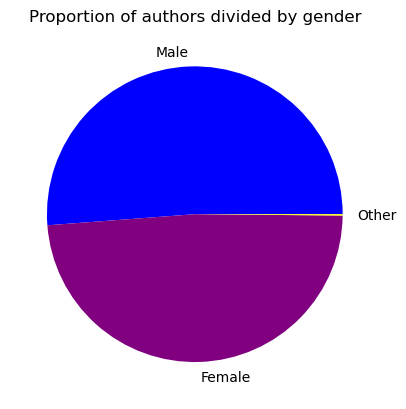

In [8]:
# Pie chart with percentage of authors divided by gender
authors_gender = authors['gender']
#authors_gender.plot()
#plt.title('Pie Chart')
#plt.show()
authors_gender = authors['gender'].dropna()
fig, ax = plt.subplots()
ax.pie(authors_gender.value_counts(), labels=authors_gender.apply(lambda x: x.title() if isinstance(x, str) else x).unique(),
       colors = ['blue', 'purple', 'yellow'])
ax.set_title('Proportion of authors divided by gender')

It's shown that the authors are evenly distributed between biological genders. There is an extremely low representation of non-binary authors, being a minority.

In [7]:
# Histogram of the average rating of books
dfs = []

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

for chunk in chunks:
    sel_col = chunk[['average_rating']]
    dfs.append(sel_col)

avg_rating = pd.concat(dfs)

Text(0, 0.5, 'Density')

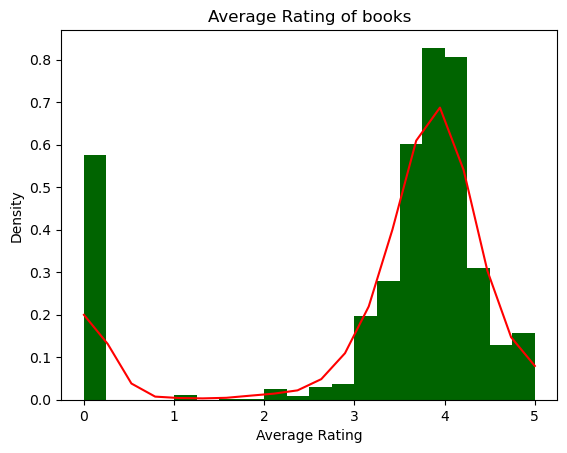

In [8]:
xs = np.linspace(0,5,num=20)

# Compute kernel density to plot on top of the histogram
density = gaussian_kde(avg_rating.T, bw_method=0.2)
dens_pdf = density.pdf(xs)

fig, ax = plt.subplots()

ax.hist(avg_rating, bins = 20, density = True, color = 'darkgreen')
ax.plot(xs,dens_pdf, color = 'red')
ax.set_title('Average Rating of books')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Density')

This plot is showing us that, besides of an extremely high number of 0-rated books, the majority of books have got an average rating between 3.5 and 4.5. It seems to be that almost all books in this dataset are enjoyed by the audience, since the high number of 0-rated books might be caused by a missing value or an error.

In [22]:
# Number of books by publisher barplot
# Counter function from collections library is used

chunks = pd.read_json(books_path, lines=True, chunksize=50000)
publisher_counter = Counter()

# Read the JSON file in chunks and process them one by one
for chunk in chunks:
    #Remove empty strings and count publisher frequencies
    chunk = chunk[chunk['publisher'].str.strip() != '']
    chunk_publisher_counter = Counter(chunk['publisher'])
    publisher_counter.update(chunk_publisher_counter)

Text(0, 0.5, 'Number of Books')

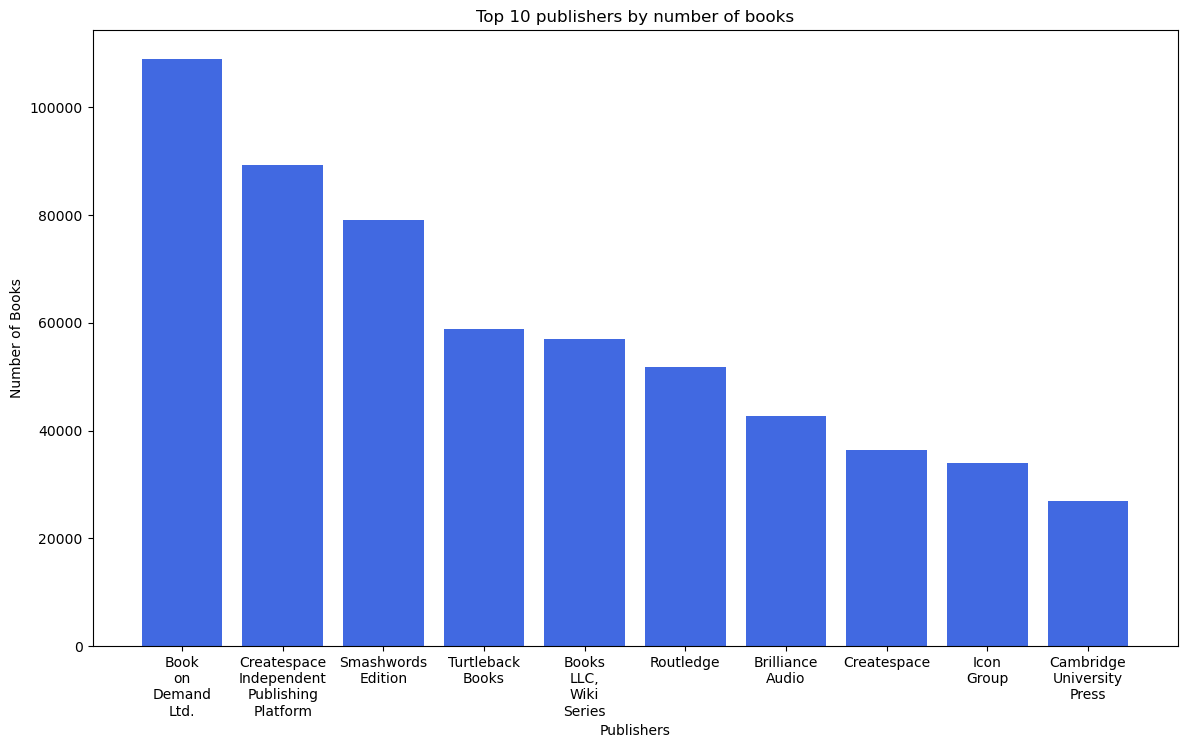

In [73]:
# Merge publishers with multiple labels
publisher_counts = pd.Series(dict(publisher_counter))
publisher_counts['Scholastic Inc.'] = publisher_counts.get('Scholastic Inc.', 0) + publisher_counts.get('Scholastic Inc', 0) + publisher_counts.get('Scholastic', 0)
del publisher_counts['Scholastic Inc']
del publisher_counts['Scholastic']

# Take top 10 publishers by number of books
major_publishers = publisher_counts.sort_values(ascending = False)[0:10].to_dict()

# Preprocess names to make them fit well inside the plot
names = []
for k in major_publishers.keys():
    names.append(k.replace(' ', '\n'))

fig, ax = plt.subplots(figsize = (14,8))

ax.bar(names, major_publishers.values(), color = 'royalblue')
ax.set_title('Top 10 publishers by number of books')
ax.set_xlabel('Publishers')
ax.set_ylabel('Number of Books')

The distribution of publishers is heterogeneous (it seems to not be a monopolistic industry), considering that the top 10 of them (by number of books published) published less than 1/10 of the overall number of books.

# RQ2:
## Plot the number of books for each author in descending order.
***comment:*** simply plotted the top 10 authors cause it is not possible to plot all the authors here. decided to drop "Unkown" from the dataset as it is info we don,t have whereas Anonymous is data we could have gotten but the authors decided to not give the info. So "Anonymous" makes the final cut.

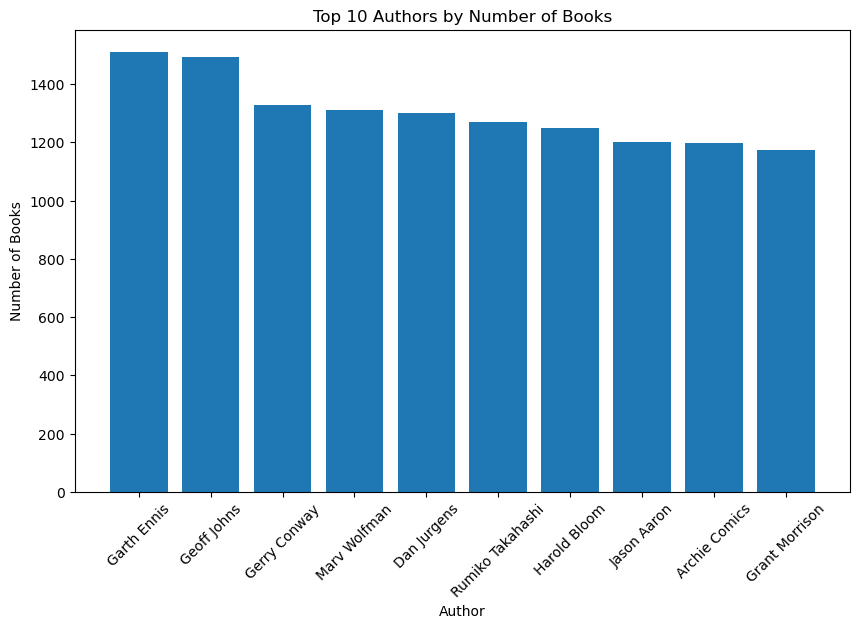

In [15]:
# Plot the authors by book count in descending order (Top 10)
authors = authors.sort_values(by='works_count', ascending=False)

# Remove rows where 'name' is 'Unknown'
authors = authors[authors['name'] != 'Unknown']

top_authors = authors.head(10)

# Create a bar plot for the top 10 authors
plt.figure(figsize=(10, 6))
plt.bar(top_authors['name'], top_authors['works_count'])
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Printed the list of authors based on there number of books in decending order

In [16]:
# Sort the authors by book count in descending order
authors = authors.sort_values(by='works_count', ascending=False)
print(authors['name'])

4336             Garth Ennis
3115             Geoff Johns
10205           Gerry Conway
3072            Marv Wolfman
807              Dan Jurgens
                 ...        
169787    Kathleen Boettcher
345659           Joe Klunder
345660            Kam Verdee
164239         Fabiola Arace
298748       Aisha Aldossari
Name: name, Length: 243367, dtype: object


## Which book has the highest number of reviews?

In [17]:
# Initialize variables to keep track of the maximum ratings_count and book details
max_ratings_count = 0
max_ratings_book = None

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# Iterate through the chunks
for chunk in chunks:
    # Find the maximum ratings_count in the current chunk
    max_chunk_ratings = chunk['ratings_count'].max()

    # Find the book details with the maximum ratings_count in the current chunk
    max_chunk_book = chunk[chunk['ratings_count'] == max_chunk_ratings]

    # Compare with the maximum found so far
    if max_chunk_ratings > max_ratings_count:
        max_ratings_count = max_chunk_ratings
        max_ratings_book = max_chunk_book
        max_ratings_title = max_chunk_book['title'].values[0]

# Print the book details with the maximum ratings_count
print("Book with the maximum ratings_count:")
print(max_ratings_book)
print(f"Title: {max_ratings_title}")

Book with the maximum ratings_count:
               id                                              title authors  \
5236525  19447979  Harry Potter und der Stein der Weisen (Harry P...    None   

          author_name  author_id  work_id isbn isbn13 asin language  ...  \
5236525  J.K. Rowling    1077326  4640799                       ger  ...   

                 format edition_information  \
5236525  Kindle Edition                       

                                                 image_url  \
5236525  https://i.gr-assets.com/images/S/compressed.ph...   

                  publisher num_pages series_id   series_name series_position  \
5236525  Pottermore Limited       335     45175  Harry Potter               1   

                                                   shelves  \
5236525  [{'name': 'fantasy', 'count': 63686}, {'name':...   

                                               description  
5236525  Harry Potter's life is miserable. His parents ...  

[1 rows x 26 colum

## Which are the top ten and ten worst books concerning the average score?
***comment***: There are more books with these two rating (0.0, 5.0) then ten. So this one matric is not enough to find the top ten, need more parameters like 'Fans count'.

In [19]:
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

dfs = []

for chunk in chunks:
    dfs.append(chunk[['title', 'average_rating']])

new_df = pd.concat(dfs)
new_df = new_df.sort_values(by='average_rating', ascending=True)
print(new_df.head(10))
print(new_df.tail(10))

                                                     title  average_rating
3513715  Die Blut-Fahne Ausgestecket Zur Warnung Politi...             0.0
4221863  Imagining Robin Hood: The Late-Medieval Storie...             0.0
4221868  British Foreign Secretaries in an Uncertain Wo...             0.0
4221870  DNA Methylation: Approches, Methods, and Appli...             0.0
1409141  Six Great Poets: Chaucer, Pope, Wordsworth, Sh...             0.0
4221878  Post-Bubble Us Economy: Implications for Finan...             0.0
4221880  Rating Management's Effectiveness: With Case S...             0.0
4221881  Managing Development: Measures of Success and ...             0.0
4221884  The Edge of Life: Human Dignity and Contempora...             0.0
4221861                        Nigerian Historical Studies             0.0
                                                     title  average_rating
6322350  Etudes Sur La Littérature Et Les Mœurs Des Ang...             5.0
4752707  Revue Des Cours 

## Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
***comment***: Cleaned the data of all the empty stirngs in the language column. Decided to group together eng, eng-US, eng-GB as one language "eng". As there are a lot of languages, set a threshold value of 10000, and language with under 10000 books is sent to the "other" column.

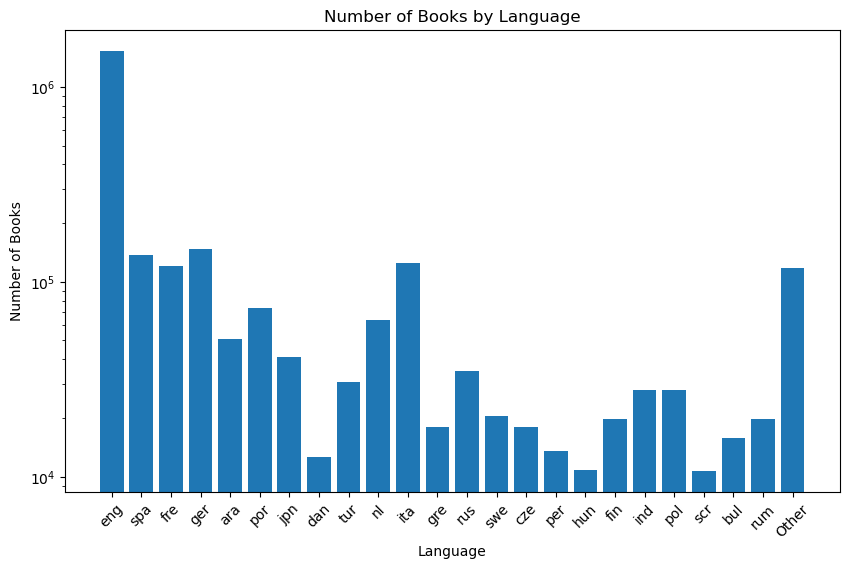

In [20]:
chunks = pd.read_json(books_path, lines=True, chunksize=50000)
language_counter = Counter()

# Read the JSON file in chunks and process them one by one
for chunk in chunks:
    #Remove empty strings
    chunk = chunk[chunk['language'].str.strip() != '']
    chunk_language_counter = Counter(chunk['language'])
    language_counter.update(chunk_language_counter)

# Extract language names and counts from the Counter
languages, counts = zip(*language_counter.items())

# Define a threshold to group less common languages
threshold = 10000

language_counts = pd.Series(dict(language_counter))
major_languages = language_counts[language_counts >= threshold].to_dict()

# Merge variations of English into 'eng'
major_languages['eng'] = major_languages.get('eng', 0) + major_languages.get('en-US', 0) + major_languages.get('en-GB', 0)
del major_languages['en-US']
del major_languages['en-GB']

# Group less common languages into 'Other Languages'
other_languages = language_counts[language_counts < threshold].sum()
major_languages['Other'] = other_languages

plt.figure(figsize=(10, 6))
plt.bar(major_languages.keys(), major_languages.values())
plt.title('Number of Books by Language')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.yscale('log') #using log cause of the high volume of english books
plt.show()

## How many books have more than 250 pages?

In [21]:
count = 0

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

for chunk in chunks:
    # Filter out non-numeric values(NaN) in 'num_pages' before comparison
    chunk['num_pages'] = pd.to_numeric(chunk['num_pages'], errors='coerce')
    count += len(chunk[chunk['num_pages'] > 250])

print("Number of books with 250+ pages:", count)

Number of books with 250+ pages: 1810335


## Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

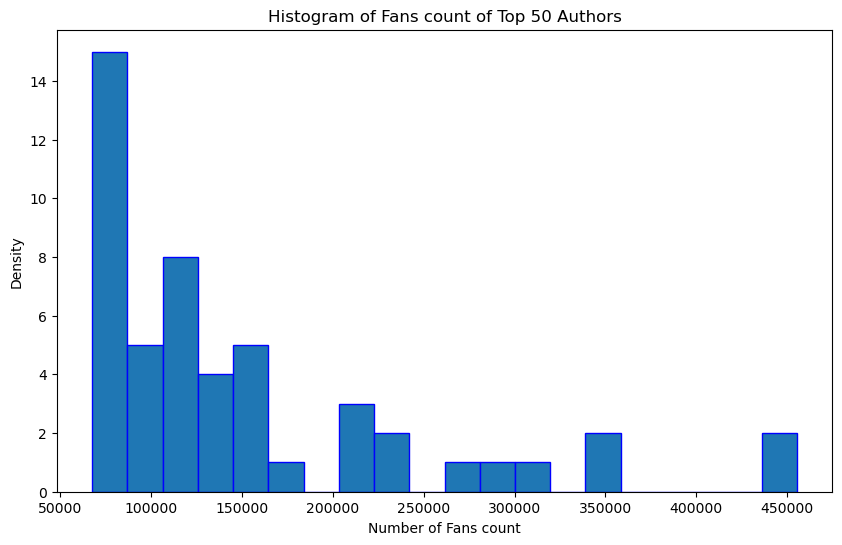

In [34]:
# Group by author and calculate the number of books each author has written
author_counts = authors.groupby('name')['fans_count'].sum()

sorted_authors = author_counts.sort_values(ascending=False)

top_50_authors = sorted_authors.head(50)

# Filter the DataFrame to include only the top 50 authors
filtered_df = authors[authors['name'].isin(top_50_authors.index)]

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(filtered_df['fans_count'], bins=20, edgecolor='blue')
plt.xlabel('Number of Fans count')
plt.ylabel('Density')
plt.title('Histogram of Fans count of Top 50 Authors')
plt.show()

# RQ3
## Write a function that takes as input a year and returns as output the following information:
* The number of books published that year.
* The total number of pages written that year.
* The most prolific month of that year.
* The longest book written that year.

***comment:*** Well to make my life easier, i first created a new df with only the two columns that i need from the books dataset.

In [23]:
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

dfs = []

for chunk in chunks:
    selected_columns = chunk[['publication_date', 'num_pages']]
    dfs.append(selected_columns)

new_df = pd.concat(dfs)
print(new_df)

        publication_date num_pages
0                2004-09       870
1             2003-11-01       309
2             2003-11-01       352
3             2004-05-01       435
4             2002-09-28       734
...                  ...       ...
7027426             1999       597
7027427       2015-08-25       304
7027428             2011       320
7027429                           
7027430             2015       236

[7027431 rows x 2 columns]


***comment:*** This is the function that return the four values asked in the ques. first need to clean both column off of the empty and NaN values. deleted the rows where num_pages were >21450 (largest sculpture in the world "One Piece").

In [24]:
def yeardf(year):
    year_records = new_df[new_df['publication_date'].str.startswith(year)]

    if year_records.empty:
        return 0

    # Count the number of records
    count = len(year_records)

    # Drop rows with NaN and empty values in the "num_pages" column
    year_records = year_records.dropna(subset=['num_pages'])
    year_records = year_records[year_records['num_pages'] != '']
    year_records = year_records[year_records['num_pages'] < 21450]
    # Drop rows with missing or error data as well as years without months in the "publication_date" column
    year_records = year_records.dropna(subset=['publication_date'])
    year_records = year_records[year_records['publication_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')]


    if year_records.empty:
        return 0, 0, None, 0

    #Calculate the total num_pages for the year
    year_records['num_pages'] = year_records['num_pages'].astype(int)
    total_num_pages = year_records['num_pages'].sum()

    # Find the month with the highest num_pages
    year_records['month'] = year_records['publication_date'].str.extract(r'-(\d{2})-')
    year_records['month'] = year_records['month'].astype(int)
    # Group the data by month and calculate the sum of 'num_pages' for each month
    monthly_sum = year_records.groupby('month')['num_pages'].sum()
    # Find the month with the highest total 'num_pages'
    max_month = monthly_sum.idxmax()
    month_names = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'july',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    max_month_name = month_names.get(max_month, None)

    # Filter the data for the month with the highest total num_pages
    max_month_data = year_records[year_records['month'] == max_month]
    # Find the highest value of num_pages for that month
    max_num_pages = max_month_data['num_pages'].max()

    return count, total_num_pages, max_month_name, max_num_pages

***comment:*** Simply testing the function by calling the function and seeing outputs ofr a given year.

In [25]:
count_1971,total_num_pages_1971, max_month_1971, max_num_pages_1971 = yeardf('1971')
print(f"Number of records for 1971: {count_1971}")
print(f"Total num_pages for 1971: {total_num_pages_1971}")
print(f"Month with highest num_pages for 1971: {max_month_1971}")
print(f"Highest single value of num_pages for 1971: {max_num_pages_1971}")

Number of records for 1971: 12152
Total num_pages for 1971: 1041796
Month with highest num_pages for 1971: January
Highest single value of num_pages for 1971: 1743


***comment:*** The dataset has oldest publication date from 1899 to the most recent one in 2019. so ran the function with an array containng our given years and appended the genarated data in a new df. Also printed the first and last 10 years. No need to sort caus data is already sorted.

In [26]:
years = list(map(str, range(1899, 2019)))

results = []

for year in years:
    count, total_num_pages, max_month_name, max_num_pages = yeardf(year)
    results.append({'Year': year, 'NumOfBooks':count, 'TotalNumPages': total_num_pages, 'MaxMonthName': max_month_name, 'MaxNumPages': max_num_pages})

RQ_df = pd.DataFrame(results)

print("Head (First Ten Years):\n", RQ_df.head(10))
print("Tail (Last Ten Years):\n", RQ_df.tail(10))

Head (First Ten Years):
    Year  NumOfBooks  TotalNumPages MaxMonthName  MaxNumPages
0  1899         407          23554     December          651
1  1900        3115         638041        April         1080
2  1901         399          24707      January         2336
3  1902         389          12019      January          646
4  1903         375           7884        April          551
5  1904         419          12087      January          777
6  1905         443          25048         June          995
7  1906         423          15551     February         4286
8  1907         448           9792      January          608
9  1908         424           7735      January          528
Tail (Last Ten Years):
      Year  NumOfBooks  TotalNumPages MaxMonthName  MaxNumPages
110  2009      238502       41903867      October        15412
111  2010      290099       50477990      January         5849
112  2011      376871       53529332      October         7260
113  2012      445454       

In [28]:
#RQ3 (openAI)

# Sample function to calculate required information for a year
def get_year_info(chunk, year):
    chunk['Year'] = chunk['publication_date'].str.extract(r'(\d{4})').astype(int)
    chunk_year = chunk[chunk['Year'] == year]
    num_books = chunk_year.shape[0]
    total_pages = chunk_year['num_pages'].sum()
    # Check if there are records for the year before finding the most prolific month
    if not chunk_year.empty:
        most_prolific_month = chunk_year.loc[chunk_year['num_pages'].idxmax()]['Month']
        longest_book = chunk_year['num_pages'].max()
    else:
        most_prolific_month = None
        longest_book = None

    return num_books, total_pages, most_prolific_month, longest_book

# Initialize a list to store chunk results
results = []

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# Load the dataset in chunks
for chunk in chunks:
    # Extract the year from the "publication date" column
    chunk['Year'] = chunk['publication_date'].str.extract(r'(\d{4})')
    # Filter out rows with NaN (missing) years
    chunk = chunk[~chunk['Year'].isna()]

    # Calculate the required information for each year in the current chunk
    unique_years = chunk['publication_date'].str.extract(r'(\d{4})').dropna().astype(int)
for year in unique_years:
    year_info = get_year_info(chunk, year)
    results.append(year_info)

# Create a data frame with the required information for each year
df = pd.DataFrame(results, columns=['NumBooks', 'TotalPages', 'MostProlificMonth', 'LongestBook'])

# Display the head and tail of the data frame for the first ten and last ten years
print("Head (First Ten Years):\n", df.head(10))
print("Tail (Last Ten Years):\n", df.tail(10))

Head (First Ten Years):
    NumBooks  TotalPages MostProlificMonth LongestBook
0         0           0              None        None
Tail (Last Ten Years):
    NumBooks  TotalPages MostProlificMonth LongestBook
0         0           0              None        None


# RQ4: 

#### You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

We can find eventual eponymous authors by using the *authors.duplicated* pandas function, which returns **True** at rows with a duplicated value inside an arbitrary column.

In [13]:
epon_authors = authors.loc[authors.duplicated('name', keep = False)] # a pandas function is leveraged to find eventual eponymous
print(epon_authors.shape) # there are 32 eponymous among authors
epon_authors

(32, 12)


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
10873,1561,4.00,136,"[235322, 1387676, 564950, 2526180, 927948, 754...","[242897, 1397503, 578007, 2518782, 943011, 781...",121,44326,Hildegard von Bingen,female,https://images.gr-assets.com/authors/124802700...,"Hildegard of Bingen (1098 - 1179), also known ...",116
14943,1887,3.69,252,"[193599, 158276, 107494, 15319004, 65211332, 1...","[200116, 163953, 111613, 10414795, 41795411, 1...",47,64550,Christopher Phillips,male,https://images.gr-assets.com/authors/131747281...,"I'm an author, scholar and pro-democracy activ...",44
16619,8585,4.03,514,"[1724207, 298130, 1969164, 2166607, 1969167, 3...","[232124, 128944, 720272, 307160, 4227791, 4053...",99,74084,Peter Green,male,https://images.gr-assets.com/authors/151126909...,<i>There is more than one author by this name ...,50
19037,16012,4.05,907,"[2067827, 609753, 189331, 149172, 191621, 5823...","[2062614, 623390, 195763, 154551, 198096, 2602...",307,89376,William Messner-Loebs,male,https://images.gr-assets.com/authors/128361376...,William Messner-Loebs (born William Francis Lo...,20
99922,5575,4.50,63,"[3347509, 15988114, 15987713, 17983855, 159873...","[3310290, 11066823, 11066429, 12833536, 110660...",44,1400886,Yordan Yovkov,male,https://images.gr-assets.com/authors/122670105...,Йордан Стефанов Йовков участва в Балканската и...,123
114790,7,4.14,2,"[58140773, 72228246, 75988182, 73547825, 69562...","[54269468, 49908930, 51265022, 49891211, 44904...",29,17059660,Hildegard von Bingen,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,"See <a href=""https://www.goodreads.com/author/...",4
127000,53953,3.93,7914,"[42677282, 48236646, 56445994, 49993158, 64877...","[23129410, 28208687, 36421253, 29634931, 43386...",18,2559520,Joseph Fink,male,https://images.gr-assets.com/authors/150631972...,Joseph created and co-writes WELCOME TO NIGHT ...,1647
134763,4727,3.95,817,"[19112736, 48190343, 6489728, 14704070, 650274...","[44415634, 54580510, 6304929, 9813662, 1364650...",11,2864244,محمد نجيب,male,https://images.gr-assets.com/authors/145799265...,اللواء أركان حرب محمد نجيب (1901 - 1984) سياسي...,293
146774,554,3.57,89,"[1107742, 2419905, 3114367, 21615327, 14763449...","[1120667, 2412728, 3083322, 15865314, 9871791,...",8,3136330,John Mole,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,"John Mole, born in 1945, is an author of comic...",5
148043,38,4.50,22,"[7402062, 20073524, 15936055, 70407446, 637318...","[7138443, 14431458, 11016798, 45644153, 408896...",9,3168647,Katherine Mercurio Gotthardt,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,Katherine Mercurio Gotthardt is a prose and po...,1


As we can see, there are a few eponymous authors. To be precise, 32 of them are so.

#### Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written

Here, we've taken advantage of the *defaultdict* object provided by the *collections* library. An empty *defaultdict* object is created, with the constraint that future values must be lists.  
For every chunk, we append every book title written by one of the chosen authors to the correspondent list (value) inside the dictionary. 

In [11]:
# "defaultdict" method from collections library is used

def books_titles(a_ids,size = 50000):
    # Using a defaultdict we can create an empty dictionary of lists
    out_dict = defaultdict(list)
    chunks = pd.read_json(books_path, lines=True, chunksize=size)
    
    for chunk in chunks:
        for i in a_ids:
            # We add a key for every given author id (if it is included in the books dataset), then append the books
            # found in every chunk to the list of them written books
            if i in chunk.author_id.values:
                out_dict[i].append(chunk.title.loc[chunk.author_id == i].values[0])
    
    return out_dict

#### What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

Leveraging the previously written function, we obtain a dictionary where at every id of the top 20 authors (by average rating) corresponds a list of its books titles.  
By using *dictionary comprehension* we replace every title inside the dictionary with its length. Then, we search for the maximum length and the respective title.  
A simpler process is done to find the longest book title overall: it's necessary to search for the longest title inside each chunk and save it if it's longer that the longest title found until that moment.

In [12]:
# Firstly we put ids of the top 20 authors by average rating inside an array
top20_authors = authors.sort_values(by =['average_rating'], ascending = False)
author_ids = top20_authors.id[0:20].tolist()

# Then, leveraging the previously written function, we get every title of books published by these authors
top20_titles = books_titles(author_ids)

In [13]:
# We get the length of the titles taken previously
len_top20_titles = {k: list(map(len,v)) for k,v in top20_titles.items()}

max_len = -np.inf
max_title = ''

# We search for the longest one with a for loop
for k,v in len_top20_titles.items():
    temp_max = np.max(v)
    if temp_max > max_len:
        max_title = top20_titles[k][np.argmax(v)]
        max_len = temp_max

print('The longest title among all books published by top 20 authors is \"'+max_title+'\" with a number of',max_len,'characters.')

The longest title among all books published by top 20 authors is "Optimized Nutrition:: A strategic guide for the martial artist (Volume 1)" with a number of 73 characters.


In [14]:
# Search for the longest overall book title in the dataset
max_len = -np.inf
max_title = ''

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

for chunk in chunks:
    temp_max = np.max(chunk.apply(lambda row: len(row['title']), axis = 1))
    if temp_max > max_len:
        max_title = chunk.title.iloc[np.argmax(chunk.apply(lambda row: len(row['title']), axis = 1))]
        max_len = temp_max

print('The longest overall book title in the dataset is \"'+max_title+'\" with a number of',max_len,'characters.') #?????

The longest overall book title in the dataset is "The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd..." with a number of 255 characters.


#### What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer

The process is the same as finding the longest book title, but instead we search for the shortest one.

In [76]:
# Search for the shortest overall book title in the dataset
min_len = np.inf
min_title = ''

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

for chunk in chunks:
    temp_min = np.min(chunk.apply(lambda row: len(row['title']), axis = 1))
    if temp_min < min_len:
        min_title = chunk.title.iloc[np.argmin(chunk.apply(lambda row: len(row['title']), axis = 1))]
        min_len = temp_min
        
print('The shortest overall book title in the dataset is \"'+min_title+'\" with a number of',min_len,'characters.')

The shortest overall book title in the dataset is "" with a number of 0 characters.


As shown during preprocessing, a lot of book titles are missing and replaced with an empty string. Therefore, the shortest book title found without any preprocessing is a missing string.  
We can solve this problem by dropping every row with an empty string as book title during the search.

In [12]:
# Search for the shortest overall book title in the dataset
min_len = np.inf
min_title = ''

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

for chunk in chunks:
    chunk = chunk[chunk['title'].str.strip() != '']
    temp_min = np.min(chunk.apply(lambda row: len(row['title']), axis = 1))
    if temp_min < min_len:
        min_title = chunk.title.iloc[np.argmin(chunk.apply(lambda row: len(row['title']), axis = 1))]
        min_len = temp_min
        
print('The shortest overall book title in the dataset is \"'+min_title+'\" with a number of',min_len,'characters.')

The shortest overall book title in the dataset is "a" with a number of 1 characters.


Even though empty strings are ignored, there are some typos inside the dataset. So a books with title "a" is recognized as the shortest one.

## RQ5: 

#### Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

This question required basically to sort the authors by fans count and books count. It's done by using the *sort_values* pandas function.  
The first 10 rows represent the most influential authors (by fans count and books count).

Text(0.5, 1.0, 'Respective number of books published')

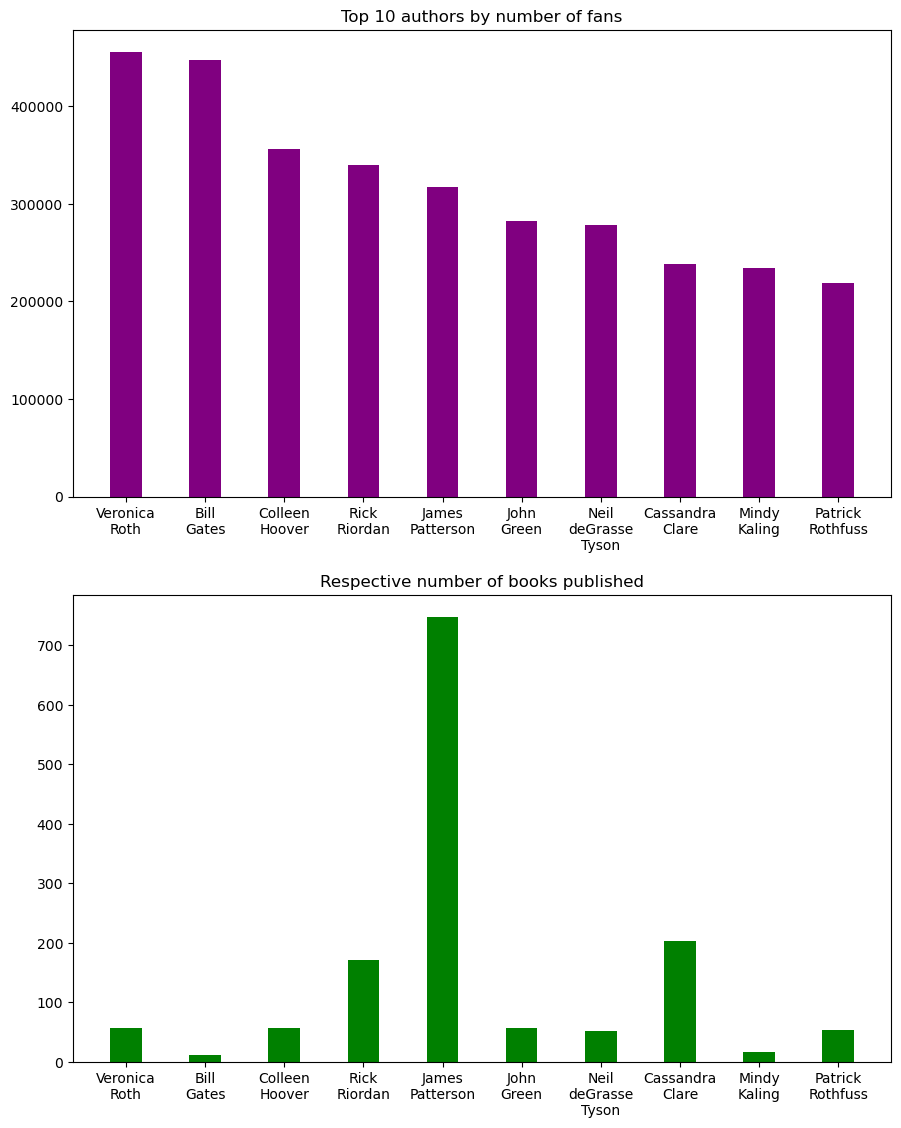

In [37]:
# Sort authors by fans count, using the number of books as a tie breaker
top10_authors = authors.sort_values(by = ['fans_count', 'works_count'], ascending = False)

names = np.char.replace(top10_authors.name[0:10].values.astype(str),'  ',' ')
names = np.char.replace(names, ' ', '\n')

# Plot the top 10 authors by number of fans and their respective number of books 
fig, axes = plt.subplots(nrows = 2, figsize = (10,12))
fig.tight_layout(pad = 5)
fans_bar = axes[0].bar(x = names, height = top10_authors.fans_count[0:10], width = 0.4, color = 'purple')
books_bar = axes[1].bar(x = names, height = top10_authors.works_count[0:10], width = 0.4, color = 'green')
axes[0].set_title('Top 10 authors by number of fans')
axes[1].set_title('Respective number of books published')

As shown in the plots, the most influencial author is Veronica Roth, followed by the billionaire Bill Gates and Colleen Hoover. Even though James Patterson published the most number of books among these authors, he's the 5th most popular.

#### Have they published any series of books? If any, extract the longest series name among these authors

Here, we extracted the top 10 authors ids and searched for books written by them in the **lighter_books** dataset.
For each book we append the eventual series name to which it belongs to a list.  
In the end, we print the longest title inside the list (with its length)

In [45]:
# We get the top 10 authors (by number of fans and number of books published) ids
author_ids = top10_authors[0:10].id.tolist()

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

s_titles = []

# We store into a list all names of the eventual series published from these authors
for chunk in chunks:
    for i in author_ids:
        if i in chunk.author_id.values:
            s_titles.append(chunk.series_name.loc[chunk.author_id == i].values[0])

In [48]:
# With the argmax function from numpy it's possible to extract the index of the longest series name among those selected
print('Some of the top 10 authors by numbers of fans (and number of books published) have published one or more series. The longest series title among these is \"'+ s_titles[np.argmax(np.array(list(map(len, s_titles))))]+'\" with a number of', len(s_titles[np.argmax(np.array(list(map(len, s_titles))))]), 'characters.')

Some of the top 10 authors by numbers of fans (and number of books published) have published one or more series. The longest series title among these is "Percy Jackson and the Olympians: The Graphic Novels" with a number of 51 characters.


#### How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment it

The process to find the formats which the top 10 authors have written books in is the same used to find the titles in RQ4.  
We count how many authors have published in different formats by checking, for every author, if the set generated from the respective list of formats has a cardinality greater than 1.

In [88]:
# We get the top 10 authors (by number of fans and number of books published) ids
author_ids = top10_authors[0:10].id.tolist()

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# Then, we store any format published by every of these authors in a dictionary 
top10_formats = defaultdict(list)
for chunk in chunks:
    for i in author_ids:
        if (i in chunk.author_id.values) and (chunk.format.loc[chunk.author_id == i].values[0] != ''):
            top10_formats[i].append(chunk.format.loc[chunk.author_id == i].values[0])

In [89]:
# We print the number of authors who have been published in different formats by checking the length 
# of the set generated from the list containing the formats they have published in 
multi_form_count = 0

for k,v in top10_formats.items():
    if len(set(v)) >= 2:
        multi_form_count += 1

print('Among the top 10 authors by numbers of fans (and number of books published), '+str(multi_form_count)+' have published one or more of their books in two different formats, at least.')

Among the top 10 authors by numbers of fans (and number of books published), 10 have published one or more of their books in two different formats, at least.


Text(0, 0.5, 'Number of books')

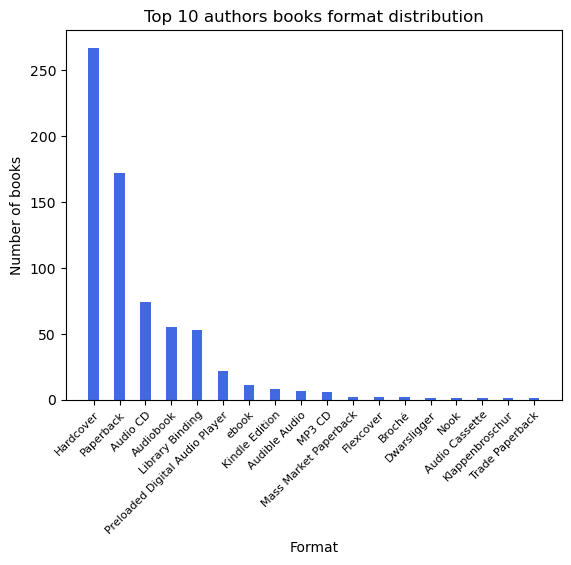

In [127]:
# We create a dataframe including all the formats of top 10 authors books
top10_formats_df = pd.Series(top10_formats)

# We plot the distribution of formats as a bar plot
fig, ax = plt.subplots()
ax.bar(x = top10_formats_df.explode().unique(), height = top10_formats_df.explode().value_counts(), width = 0.4, color = 'royalblue')
ax.set_title('Top 10 authors books format distribution')
ax.set_xticks(ax.get_xticks(), top10_formats_df.explode().unique(), rotation=45, ha='right', rotation_mode='anchor', fontsize = 8);
ax.set_xlabel('Format')
ax.set_ylabel('Number of books')

From the distribution of the formats which the top 10 authors (by fans count and number of books published) have written in, it can be observed that:
- Hardcover and Paperback are the most popular formats. This is a signal that the popularity of good old paper is almost untouched nowadays. It's also possible that most books published by these authors were published in years when no other formats were available.
- Audio CDs and Audiobooks are pretty popular, as they make possible to read a book in a more relaxed way, without using much cognitive energies. Given that recording an Audiobook (or Audio CD) is expensive, it's possible that they are popular only among top tier authors.
- Digital formats like Ebooks and Kindle Edition have got only a few count with respect to the most popular formats. That may be so because they are relatively new formats.

#### Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias”

To investigate about structural bias inside the authors dataset, it's needed to take a look at the distribution of the most important variables by gender. We've chosen boxplots to do so.

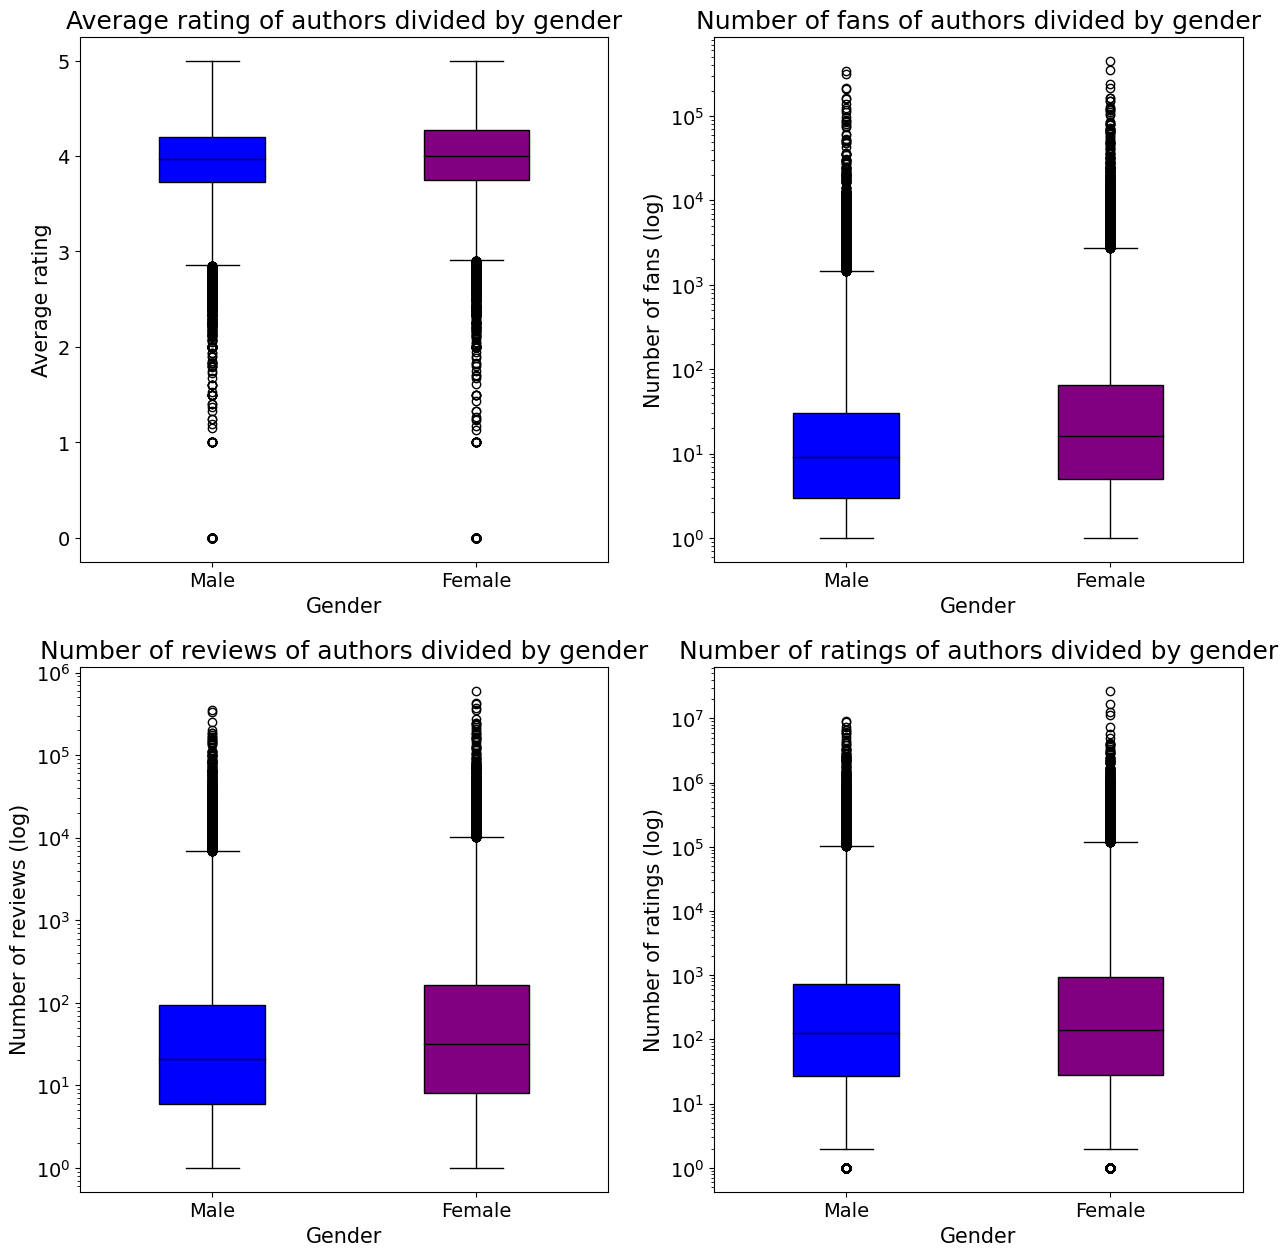

In [57]:
# Subdivide authors by gender, then plot scatterplots with these variables and compare the trendlines. Also print a summary
# of the suggested articles to understand better what is structural bias

# Boxplots with variables regarding authors, divided by gender
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))

# AVERAGE RATING
axes[0][0].boxplot(authors[authors['gender'] == 'male']['average_rating'],
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['Male'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

axes[0][0].boxplot(authors[authors['gender'] == 'female']['average_rating'],
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Female'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='purple', color='black'),
               medianprops=dict(color='black'))


axes[0][0].set_title('Average rating of authors divided by gender', fontsize = 18)
axes[0][0].set_ylabel('Average rating', fontsize = 15)
axes[0][0].set_xlabel('Gender', fontsize = 15)
axes[0][0].tick_params(axis='both', which='major', labelsize=14)

# FANS COUNT
axes[0][1].boxplot(authors[authors['gender'] == 'male']['fans_count'],
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['Male'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

axes[0][1].boxplot(authors[authors['gender'] == 'female']['fans_count'],
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Female'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='purple', color='black'),
               medianprops=dict(color='black'))


axes[0][1].set_title('Number of fans of authors divided by gender', fontsize = 18)
axes[0][1].set_ylabel('Number of fans (log)', fontsize = 15)
axes[0][1].set_yscale('log')
axes[0][1].set_xlabel('Gender', fontsize = 15)
axes[0][1].tick_params(axis='both', which='major', labelsize=14)

# TEXT REVIEWS COUNT
axes[1][0].boxplot(authors[authors['gender'] == 'male']['text_reviews_count'],
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['Male'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

axes[1][0].boxplot(authors[authors['gender'] == 'female']['text_reviews_count'],
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Female'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='purple', color='black'),
               medianprops=dict(color='black'))

axes[1][0].set_title('Number of reviews of authors divided by gender', fontsize = 18)
axes[1][0].set_ylabel('Number of reviews (log)', fontsize = 15)
axes[1][0].set_yscale('log')
axes[1][0].set_xlabel('Gender', fontsize = 15)
axes[1][0].tick_params(axis='both', which='major', labelsize=14)

# RATINGS COUNT
axes[1][1].boxplot(authors[authors['gender'] == 'male']['ratings_count'],
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['Male'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

axes[1][1].boxplot(authors[authors['gender'] == 'female']['ratings_count'],
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Female'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='purple', color='black'),
               medianprops=dict(color='black'))

axes[1][1].set_title('Number of ratings of authors divided by gender', fontsize = 18)
axes[1][1].set_ylabel('Number of ratings (log)', fontsize = 15)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Gender', fontsize = 15)
axes[1][1].tick_params(axis='both', which='major', labelsize=14)


The distribution of average rating is pretty similar across the two biological genders, while the other distributions are a bit different: in every of them, female authors have got higher median and quartiles. It may be so because female writers with a lower number of fans, number of reviews and/or ratings were ignored during data collection, leading to a mild *"structural bias"*. The alternative conclusion is that female authors have got more active fans.

It was decided to ask Google Bard to summirize the suggested articles and tell us about structural bias. The output is the following:  

*"**Racial bias in artificial intelligence: a complex problem**  
Artificial intelligence (AI) is a technology that is becoming increasingly pervasive in our lives, including in healthcare, finance, justice, and education. However, AI is also a technology that is susceptible to bias, which can have a negative impact on people from marginalized racial and ethnic groups.*  

***Racial bias in AI models can manifest itself in different ways**  
One way that racial bias can manifest itself in AI models is through data imbalance. An imbalanced dataset is a dataset in which the classes are not represented evenly. This can be a problem for machine learning algorithms, which can be misled by imbalanced data.  
For example, an AI model used to diagnose cancer could be trained on a dataset in which images of skin lesions from white patients are overrepresented. In this case, the model may be more likely to correctly diagnose cancer in white patients than in black patients, even if the skin lesions are identical.*  

***Another way that racial bias can manifest itself in AI models is through the "architecture of models".** The architecture of an AI model is the way that the model is designed and built. It includes factors such as the choice of features to use, the type of algorithm used, and the structure of the model.  
For example, an AI model used to determine sentencing in court could be designed in such a way that it gives more weight to crimes committed by people from marginalized racial and ethnic groups. In this case, the model may be more likely to give harsher sentences to people from these groups.*  

***Finally, racial bias can manifest itself in AI models through "structural bias".** Structural bias is bias that is embedded in institutions and social systems. This bias can influence the data used to train AI models, making them more likely to discriminate against people from marginalized racial and ethnic groups.  
For example, an AI model used to determine creditworthiness could be trained on a dataset of data that reflects the racial bias in the credit system. In this case, the model may be more likely to deny loans to people from marginalized racial and ethnic groups, even if these people are able to repay the loan.*  

***Addressing racial bias in AI models is a complex process**   
There is no one-size-fits-all solution to addressing racial bias in AI models. However, there are a number of measures that can be taken to mitigate the impact of bias, including:*
- ***Using training datasets that are representative of the diversity of the population.** This will help ensure that AI models are able to generalize to all groups of people.*
- ***Using algorithms that are known to be fair and non-discriminatory.** There are a number of algorithms that have been specifically designed to reduce bias.*
- ***Performing bias testing on algorithms to identify and mitigate any biases.** There are a number of bias tests that can be used to identify and mitigate any biases in AI models.*

***Reducing racial bias in AI models is an important step in ensuring that these models are used in a fair and non-discriminatory way.** It is important for AI developers to be aware of the potential for bias in their models and to take measures to mitigate the impact of bias.*  

***In conclusion, racial bias in AI models is a complex problem that can manifest itself in different ways. Addressing this problem is an important process that requires the commitment of all stakeholders.**"*  

Google Bard's answer is pretty self-explaining: structural bias is a big and modern problem of AI and us, as data scientists to be, must take care of this aspect.  
We surely need to use data that is as heterogeneus as possible and perform multiple bias tests before sending a model to production, to make sure that it's correct and ethical.

# RQ6:

#### Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [47]:
# Select column for books
col_in = ['title','author_name','language','original_publication_date','num_pages','series_id','series_name','series_position',
          'average_rating', 'rating_dist','ratings_count']

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

top10_authors_names = top10_authors.name[0:10].values

# See the first 5 lines of dataset
books2 = pd.DataFrame()
for chunk in chunks:
    chunk = chunk[col_in]
    for aut in top10_authors_names:
        books_c = chunk[chunk.author_name == aut]
        books2 = pd.concat([books2, books_c])
        
books = books2.drop_duplicates(subset='title')

#We consider only books written in English (for a smaller dataframe on which to work)
books = books[books['language']=='eng']
books['series_id'].replace('', -1, inplace=True)

col_in2 = ['author_name','language','original_publication_date','series_id','series_position']

books = books[col_in2]

In [49]:
def safe_int_convert(x):
    try:
        int(x)
        return True # numeric, success!
    except ValueError:
        return False # not numeric
    except TypeError:
        return False # null type

In [50]:
# Create a dictionary (series_id, author name)
col_in2 = ['series_id','author_name']
df5 = books[col_in2]

filter_01series = df5['series_id'] == -1

#Create a dict with series id and author name
df4 = df5[~filter_01series]
all_series = df5.set_index('series_id')['author_name'].to_dict()

#Create a dict with books (no series) and author name
df6 = df5[filter_01series]
all_books = df6.set_index('author_name')['series_id'].to_dict()

#Initialize a list and dataframe (for later)
time_delta_author = []
df_td_series = pd.DataFrame(columns=['author_name','time_delta'])

for key in all_series:
    #Delete the blank cells in 'pubblication'
    filt1 = books.original_publication_date==''
    books_rid_s = books[~filt1]
    
    #Take dataframe for each author and his/her series
    books_rid_s = books_rid_s[(books_rid_s['author_name']==all_series[key])& (books_rid_s['series_id']==key)]
    
    # In this column there are also grouped series (in only one row), but we don't care about them
    mask = books_rid_s['series_position'].map(safe_int_convert)
    books_rid_s = books_rid_s.loc[mask]
    
    #Transform 'series_position' column in integer
    books_rid_s = books_rid_s.astype({'series_position':'int'})
    
    # Sort the dataframe descendingly
    books_rid_s = books_rid_s.sort_values(by=['original_publication_date'], ascending=False)
    
    # Drop duplicates (whether there are)
    books_rid_s = books_rid_s.drop_duplicates(subset='series_position', keep='last')
    
    #Create a column 'time_delta' for intervall (in days) from a book and its predecessor in the series
    books_rid_s['time_delta'] = pd.to_datetime(books_rid_s['original_publication_date'], format='mixed').diff(-1).dt.total_seconds().div(86400)
    
    #Create a list of 'mean' of each series of each author
    time_delta_author = [books_rid_s['time_delta'].mean()] + time_delta_author #[int(books_rid['time_delta'].mean())] + time_delta_author
    
#Remove 'Nan' value in the list 'time_delta_author' and print the mean of this list
time_delta_author = [time for time in time_delta_author if str(time) != 'nan']
mean = statistics.mean(time_delta_author)
print('On average, the days spent between two consecutive books in a series are:', int(mean))

On average, the days spent between two consecutive books in a series are: 785


In [51]:
#Initialize a list and dataframe (for later)
time_delta_author = []
df_td = pd.DataFrame(columns=['author_name','time_delta'])

for key in all_books:

    #Delete the blank cells in 'pubblication'
    filt1 = books.original_publication_date==''
    books_rid_b = books[~filt1]
    
    #Take dataframe for each author and his/her series
    books_rid_b = books_rid_b[(books_rid_b['author_name']==key)& (books_rid_b['series_id']==-1)]
    
    # Sort the dataframe descendingly
    books_rid_b = books_rid_b.sort_values(by=['original_publication_date'], ascending=False)
    
    #Create a column 'time_delta' for intervall (in days) from a book and its predecessor in the series
    books_rid_b['time_delta'] = pd.to_datetime(books_rid_b['original_publication_date'], format='mixed', errors= 'coerce').diff(-1).dt.total_seconds().div(86400)
    
    #Create a list of 'mean' of each series of each author
    time_delta_author = [books_rid_b['time_delta'].mean()] + time_delta_author #[int(books_rid['time_delta'].mean())] + time_delta_author
    
    #Create a dataframe with author_name and the mean of 'time_delta'
    list1 = [key, books_rid_b['time_delta'].mean()]
    df_td.loc[len(df_td)] = list1

#Remove 'Nan' value in the list 'time_delta_author' and print the mean of this list
time_delta_author = [time for time in time_delta_author if str(time) != 'nan']
mean = statistics.mean(time_delta_author)
print('On average, the days spent between two consecutive books (not in a series) are:', int(mean))

On average, the days spent between two consecutive books (not in a series) are: 704


#### For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [52]:
#Create a column ('year_pubblication') that take only the year of original publication date and put in
books['year_pubblication'] = pd.to_datetime(books['original_publication_date'], format='mixed', errors = 'coerce').dt.strftime('%Y')
filt1 = (books.original_publication_date=='')
books_year = books[~filt1]
books_year = books_year.dropna()

col_in3 = ['author_name','year_pubblication']
books_year = books_year[col_in3].sort_values(by=['year_pubblication'], ascending=True)

books_year['frequency'] = books_year.groupby(['author_name','year_pubblication'])['year_pubblication'].transform('count')
books_year = books_year.astype({'year_pubblication':'int'})
books_year = books_year.astype({'frequency':'int'})
books_year = books_year.drop_duplicates()

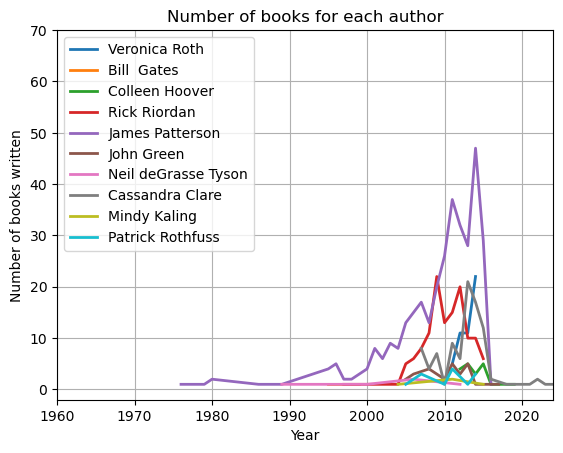

In [57]:
#Creates a dictionary that maps each author_name to a color
colori = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

dict_auth_col= {}
for auth, color in zip(top10_authors_names, colori):
    dict_auth_col[auth] = color
    
#Create a plot for each author_name
for autore, colore in dict_auth_col.items():
    df_filtrato = books_year[books_year["author_name"] == autore]
    plt.plot(df_filtrato["year_pubblication"].to_numpy(), df_filtrato["frequency"].to_numpy(), label=autore, color=colore, linewidth=2)

#Add a legend
plt.legend()

#Modify plot figure size
plt.title('Number of books for each author')
plt.xlabel('Year')
plt.ylabel('Number of books written')
plt.xlim(1960, 2024)
plt.ylim(-2,70)
plt.grid(True)

#Show the plot
plt.show()

# RQ7

#### Estimate the probability that a book has over 30% of the ratings above 4.

In [59]:
# Initialize variables to keep track of counts
total_rows = 0
above_30_percent_count = 0

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# Read the JSON file in chunks
for chunk in chunks:
    # Function to parse the rating_dist string into a dictionary
    def parse_rating_dist(rating_dist_str):
        ratings = rating_dist_str.split('|')
        rating_dict = {}
        for rating in ratings:
            key, value = rating.split(':')[0:5]
            try:
                key = int(key)
                value = int(value)
                rating_dict[key] = value
            except ValueError:
                continue
        return rating_dict

    # Function to calculate the probability for each row in a chunk
    def calculate_probability(row):
        rating_distribution = parse_rating_dist(row['rating_dist'])

        # Calculate the total number of ratings
        total_ratings = sum(rating_distribution.values())

        # Calculate the number of ratings above 4
        ratings_above_4 = sum(value for key, value in rating_distribution.items() if key > 4)

        # Calculate the probability of having more than 30% of the ratings above 4
        if total_ratings == 0:
            probability = 0  # Handle division by zero
        else:
            probability = ratings_above_4 / total_ratings
        return probability

    # Calculate the probability for each row in the chunk
    chunk['probability_above_30'] = chunk.apply(calculate_probability, axis=1)

    # Count the rows with a probability above 30%
    above_30_percent_count += len(chunk[chunk['probability_above_30'] > 0.3])
    total_rows += len(chunk)

# Calculate the overall probability that a book has over 30% of the ratings above 4
overall_probability = above_30_percent_count / total_rows

print(f"The probability that a book has over 30% of the ratings above 4: {overall_probability:.2%}")

The probability that a book has over 30% of the ratings above 4: 44.71%


**comment**: As the rating_dist contains a large amount of data, trying to create a new dataframe with only rating_dist does work like in other parts of the HW cause the machine runs out of RAM very quickly. Hence, we ran the parse_rating_dist function inside the for loop to gather our necessary data chunk by chunk.

#### Estimate the probability that an author publishes a new book within two years from its last work.

In [60]:
# Select column for books
col_in8 = ['author_name','original_publication_date','language']

chunks = pd.read_json(books_path, lines=True, chunksize=50000)

# See the first 5 lines of dataset
books5 = pd.DataFrame()
for chunk in chunks:
    part = chunk[col_in8]
    part = part[(part['original_publication_date']!='') & (part['language']== 'en')]
    books5 = pd.concat([books5, part])

In [61]:
#Create a Series of all author in books5
books_authors = books5.author_name.drop_duplicates()

In [62]:
#Create a column ('year_pubblication') that take only the year of original publication date and put in
books5['year_pubblication'] = pd.to_datetime(books5['original_publication_date'], format='mixed', errors = 'coerce').dt.strftime('%Y')
#Reduce dataset
books5_ridotto = books5[['author_name','year_pubblication']]

In [63]:
#Initialize a list and dataframe (for later)
percentage_author = []
books_timedelta_autori = pd.DataFrame()

for auth in books_authors:
    
    #Take dataframe for each author
    books_ridotto_autore = books5_ridotto[books5_ridotto['author_name']==auth]
    
    #Take the number of books for each author
    totale_libri_autore = len(books_ridotto_autore)
    
    # Sort the dataframe descendingly
    books_ridotto_autore = books_ridotto_autore.sort_values(by=['year_pubblication'], ascending=False)
    
    #Create a column 'time_delta' for intervall (in days) from a book and its predecessor in the series
    books_ridotto_autore['time_delta'] = pd.to_datetime(books_ridotto_autore['year_pubblication'], format='mixed', errors= 'coerce').diff(-1).dt.total_seconds().div(86400)

    #Consider only if 'time_delta' < 732 days (2 year)
    books_ridotto_autore = books_ridotto_autore[books_ridotto_autore['time_delta']<732]
    #Take the number of books for each author (if 'time_delta' < 732 days)
    parziale_libri_autore = len(books_ridotto_autore)

    #Remove, if the authors write only one book in the gap of 2 years
    if len(books_ridotto_autore) > 1:
        #Take the percentage of books publishes of each author in two years, divided by entire books publishes from the same author   
        percentage_author.append((parziale_libri_autore / totale_libri_autore))

#Mean of percentage of all authors
mean72 = statistics.mean(percentage_author)
print('The probability that an author publishes a new book within two years from its last work:', "{:.2f}".format(mean72*100), '%')

The probability that an author publishes a new book within two years from its last work: 66.76 %


#### In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [7]:
# Read json 'list' file with function in pandas
list_df1 = pd.read_json(list_path, lines = True, chunksize = 50000)

list_df = pd.DataFrame()
for chunk in list_df1:
    list_df = pd.concat([list_df, chunk])

In [8]:
# Take books with more than 700 pages
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

dfs = []

for chunk in chunks:
    chunk[['num_pages','series_id']] = chunk[['num_pages','series_id']].apply(pd.to_numeric).astype('Int64')
    dfs.append(chunk[chunk.num_pages >= 700]['num_pages'])

books_700 = pd.concat(dfs)

In [9]:
list_700 = list_df[list_df['num_pages']>699]
print('The probability of a book being included in this list, knowing it has more than 700 pages [P(X|Y)] is :', len(list_700)/len(books_700))

The probability of a book being included in this list, knowing it has more than 700 pages [P(X|Y)] is : 0.0


#### Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [15]:
print('To demonstrate that the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent, we demonstrate that P(X|Y) = P(X), so')
print('the probability of a book being included in this list, knowing it has more than 700 pages [P(X|Y)] (in our case is: ', len(list_700)/len(books_700), ') must be equal to')
print('the division of lenght list and lenght of books (in our case is: ', len(list_df)/row_count ,')')
del list_df

To demonstrate that the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent, we demonstrate that P(X|Y) = P(X), so
the probability of a book being included in this list, knowing it has more than 700 pages [P(X|Y)] (in our case is:  0.0 ) must be equal to
the division of lenght list and lenght of books (in our case is:  0.011599117799947094 )


We can state that there is a dependency relationship between the two events. This could have been seen intuitively: none of the books inside the "Worst Books of all Time" list has got more than 700 pages.

# RQ8

#### Can you demonstrate that readers usually rate the longest books as the worst?

In [40]:
# DataFrame named 'df' with 'num_pages' and 'average_rating' columns
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

dfs = []

for chunk in chunks:
    selected_columns = chunk[['average_rating', 'num_pages']]
    dfs.append(selected_columns)

df = pd.concat(dfs)

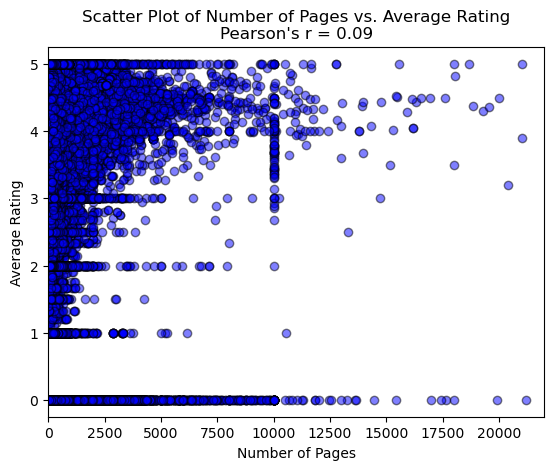

In [41]:
# Assuming you have a DataFrame 'df' with 'num_pages' and 'average_rating' columns
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

df = df.dropna(subset=['num_pages'])
df = df[df['num_pages'] != '']
df = df[df['num_pages'] < 21450] #biggest book in the world
df = df.dropna(subset=['average_rating'])
df = df[df['average_rating'] != '']

# Calculate the Pearson correlation coefficient
num_pages = df['num_pages']
average_rating = df['average_rating']

correlation_coefficient = np.corrcoef(num_pages, average_rating)[0, 1]

# Create a scatter plot
plt.scatter(num_pages, average_rating, c='b', alpha=0.5, marker='o', edgecolors='k')

# Customize plot labels and title
plt.xlabel('Number of Pages')
plt.xlim([0,22000])
plt.ylabel('Average Rating')
plt.title(f'Scatter Plot of Number of Pages vs. Average Rating\nPearson\'s r = {correlation_coefficient:.2f}')

# Display the plot
plt.show()

**Comment**: The Pearson correlation coefficient tells us that having a high number of pages doesn't imply that the average rating is high. In fact, taking a look at the plot, a lot of books with few pages have got positive ratings!

#### Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [32]:
# Dataset has 'average_rating' and 'language' columns
chunks = pd.read_json(books_path, lines=True, chunksize=50000)

dfs = []

for chunk in chunks:
    selected_columns = chunk[['average_rating', 'language','ratings_count']]
    dfs.append(selected_columns)

df = pd.concat(dfs)

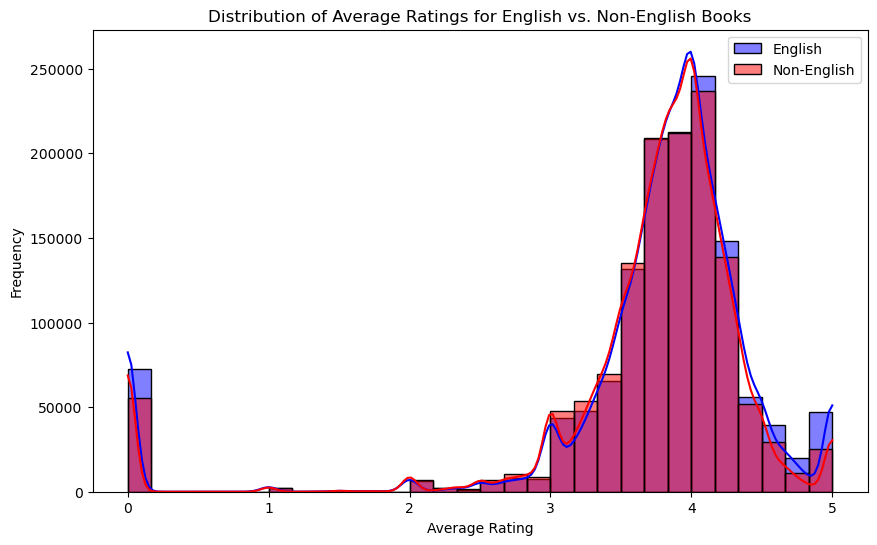

In [33]:
#RQ8 (Eng vs Non-Eng)part2
df = df.dropna(subset=['language'])
df = df[df['language'] != '']

# Filter English & Non-English books based on multiple language values
english_books = df[df['language'].isin(['eng', 'eng-US', 'eng-GB'])]
non_english_books = df[~df['language'].isin(['eng', 'eng-US', 'eng-GB'])]


# Create distribution plots for 'average_rating' for both English and non-English books
plt.figure(figsize=(10, 6))
sns.histplot(data=english_books, x='average_rating', kde=True, color='blue', label='English', bins = 30)
sns.histplot(data=non_english_books, x='average_rating', kde=True, color='red', label='Non-English', bins = 30)

plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings for English vs. Non-English Books')
plt.legend()
plt.show()

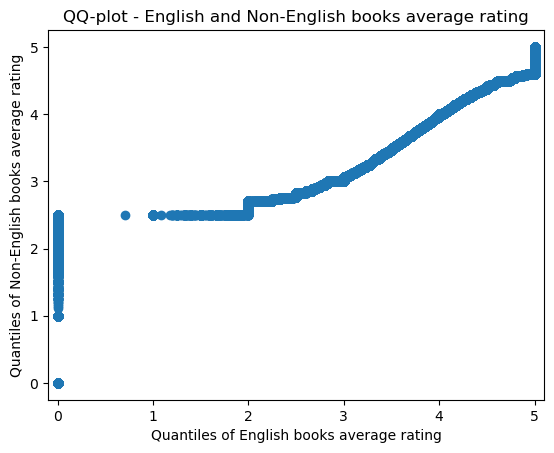

In [51]:
# Create QQ-plot to compare the two distributions
pp_x = smplt.ProbPlot(english_books['average_rating'])
pp_y = smplt.ProbPlot(non_english_books['average_rating'])


fig = smplt.qqplot_2samples(pp_x,pp_y)

plt.title('QQ-plot - English and Non-English books average rating')
plt.xlabel('Quantiles of English books average rating')
plt.ylabel('Quantiles of Non-English books average rating')


plt.show()

In [35]:
# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(english_books['average_rating'], non_english_books['average_rating'], mode = 'asymp')

print(f"Kolmogorov-Smirnov Test Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check the result of the KS test
if p_value < alpha:
    print("The distributions are significantly different (reject null hypothesis).")
else:
    print("The distributions are not significantly different (fail to reject null hypothesis).")

Kolmogorov-Smirnov Test Statistic: 0.0315
P-Value: 0.0000
The distributions are significantly different (reject null hypothesis).


#### About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [36]:
#Boxplot and confront the 'average_rating' of both
average_en = pd.DataFrame(english_books['average_rating'].describe())
average_noen = pd.DataFrame(non_english_books['average_rating'].describe())

average_en = average_en.rename(columns={"average_rating": "Average Rating (EN language)"})
average_noen = average_noen.rename(columns={"average_rating": "Average Rating (OTHER language)"})

result_AV = pd.concat([average_en, average_noen], axis=1)

result_AV

,Average Rating (EN language),Average Rating (OTHER language)
count,1.372114e+06,1.315053e+06
mean,3.689144e+00,3.684781e+00
std,9.870074e-01,8.929728e-01
min,0.000000e+00,0.000000e+00
25%,3.600000e+00,3.580000e+00
50%,3.900000e+00,3.870000e+00
75%,4.130000e+00,4.100000e+00
max,5.000000e+00,5.000000e+00


Text(0.5, 0, 'Language')

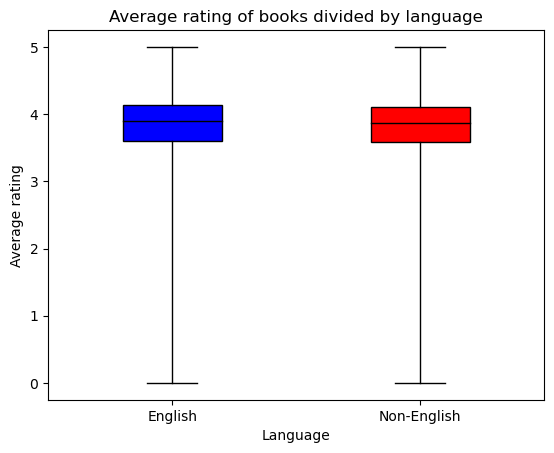

In [37]:
fig, ax = plt.subplots()

# AVERAGE RATING BOXPLOTS
ax.boxplot(english_books['average_rating'],
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['English'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

ax.boxplot(non_english_books['average_rating'],
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Non-English'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='red', color='black'),
               medianprops=dict(color='black'))


ax.set_title('Average rating of books divided by language')
ax.set_ylabel('Average rating')
ax.set_xlabel('Language')

The following information can be inferred from the dataset and boxplot we provided:

- English-language books have a higher mean rating (3.69) than books in other languages (3.19).
- English-language books have a lower grade dispersion (std 1.00) than books in other languages (std 1.54). This means that English-language books have more similar grades to each other, while books in other languages have more different grades to each other.
- The median of votes for English-language books is 3.9, while the median of votes for books in other languages is 3.79. In other words, half of the English-language books were rated positively, while half of the books in other languages were rated slightly lower.
The minimum and maximum grades for both types of books are 0 and 5, respectively.

This information suggests that English-language books tend to be more popular with readers than books in other languages. This could be due to several factors, such as the quality of translations or the greater availability of English-language books.

In [38]:
#Boxplot and confront the 'ratings_count' of both
ratings_en = pd.DataFrame(english_books['ratings_count'].describe())
ratings_noen = pd.DataFrame(non_english_books['ratings_count'].describe())

ratings_en = ratings_en.rename(columns={"ratings_count": "Ratings Count (EN language)"})
ratings_noen = ratings_noen.rename(columns={"ratings_count": "Ratings Count (OTHER language)"})

result_RA = pd.concat([ratings_en, ratings_noen], axis=1)

result_RA

,Ratings Count (EN language),Ratings Count (OTHER language)
count,1.372114e+06,1.315053e+06
mean,2.725472e+04,4.278712e+04
std,1.952962e+05,2.582817e+05
min,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.600000e+01
50%,1.150000e+02,2.530000e+02
75%,1.604000e+03,4.443000e+03
max,7.398184e+06,7.400639e+06


Text(0.5, 0, 'Language')

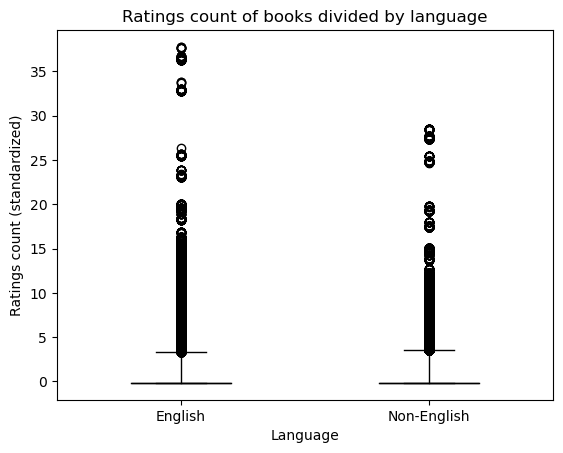

In [43]:
fig, ax = plt.subplots()

# RATINGS COUNT BOXPLOTS
ax.boxplot(scale(english_books['ratings_count']),
             positions = [1],
             vert=True,  # vertical box alignment
             patch_artist=True,  # fill with color
             whis = (1,99),
             labels=['English'], # used to label x-ticks
             widths = 0.4,
             boxprops=dict(facecolor='blue', color='black'),
             medianprops=dict(color='black'))  

ax.boxplot(scale(non_english_books['ratings_count']),
               positions = [2],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               whis = (1,99),
               labels=['Non-English'], # used to label x-ticks
               widths = 0.4,
               boxprops=dict(facecolor='red', color='black'),
               medianprops=dict(color='black'))


ax.set_title('Ratings count of books divided by language')
ax.set_ylabel('Ratings count (standardized)')
ax.set_xlabel('Language')

#### It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.

There are two possible ways to handle this question:
- The first one is fitting a regression model on data, using **text_reviews_count** as outcome variable and **fans_count** as a predictor. Checking the statistical significance and the value of the regression coefficient can lead to an answer.
- The second one is creating popularity categories from the **fans_count** variable, then using this new variable and **text_reviews_count** to perform an *ANOVA* test.  

We've opted for the first method.

In [42]:
# OLS function from statsmodels package is used
# Fit a linear regression model on the standardized values
fans_std = scale(authors['fans_count'].to_numpy().reshape(-1, 1))
reviews_std = scale(authors['text_reviews_count'].to_numpy().reshape(-1, 1))

reg_mod = sm.OLS(reviews_std, sm.add_constant(fans_std)).fit()

print('The intercept is equal to', round(reg_mod.params[0],3) , 'and the regression coefficient is equal to', round(reg_mod.params[1],3),'with p-values respectively equal to',round(reg_mod.pvalues[0],5),'and',round(reg_mod.pvalues[1],5),'. The adjusted R^2 is equal to',round(reg_mod.rsquared,3))

The intercept is equal to -0.0 and the regression coefficient is equal to 0.671 with p-values respectively equal to 1.0 and 0.0 . The adjusted R^2 is equal to 0.451


From a simple linear regression we get a regression coefficient equal to 0.671: it's also statistically significant given that the *p-value* of the associated test is nearly equal to 0, leading us to rejecting the hypothesis that the coefficient is null.  
Though the adjusted $R^2$, an index that represents the variance of the outcome variable "explained" by the predictor(s), is a bit low: it's equal to 0.451 only.  
Let's visualize data in a scatterplot to check if a polynomial regression may be better.

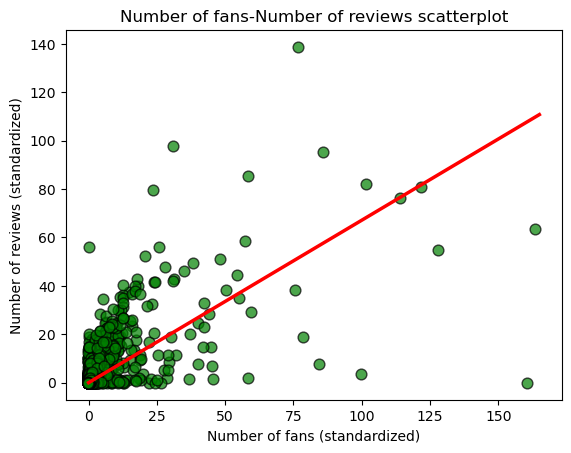

In [50]:
fig, ax = plt.subplots()

ax.scatter(fans_std, reviews_std,
           s=60, 
           alpha=0.7, 
           edgecolors='k',
           color = 'green')
ax.set_title('Number of fans-Number of reviews scatterplot')
ax.set_xlabel('Number of fans (standardized)')
ax.set_ylabel('Number of reviews (standardized)')
xseq = np.linspace(0, 165, num=165)
ax.plot(xseq, reg_mod.params[0] + reg_mod.params[1] * xseq, color="red", lw=2.5);

As expected, the regression line doesn't fit data very well. There are only a few authors with an extremely high number of fans and/or reviews. Let's try with a polynomial regression, maybe a parabola would fit data better.

In [54]:
# PolynomialFeatures function from sklearn package is used
polynomial_features= PolynomialFeatures(degree=2)
fans_std_p = polynomial_features.fit_transform(fans_std)

reg_mod_p = sm.OLS(reviews_std, sm.add_constant(fans_std_p)).fit()

print('The intercept is equal to ' + str(round(reg_mod_p.params[0],3)) + ', the first degree regression coefficient is equal to '+ str(round(reg_mod_p.params[1],3))+', and the second degree regression coefficient is equal to '+ str(round(reg_mod_p.params[2],3))+'. Their p-values are respectively equal to '+str(round(reg_mod_p.pvalues[0],5))+', '+str(round(reg_mod_p.pvalues[1],5))+' and '+str(round(reg_mod_p.pvalues[2],5))+'. The adjusted R^2 is equal to',round(reg_mod_p.rsquared,3))

The intercept is equal to 0.007, the first degree regression coefficient is equal to 1.276, and the second degree regression coefficient is equal to -0.007. Their p-values are respectively equal to 0.0, 0.0 and 0.0. The adjusted R^2 is equal to 0.579


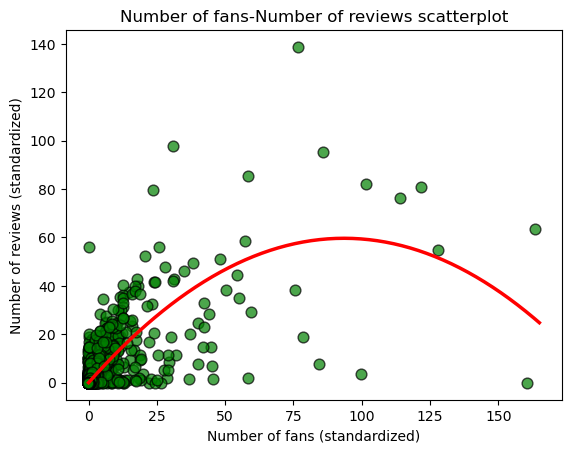

In [55]:
fig, ax = plt.subplots()

ax.scatter(fans_std, reviews_std,
           s=60, 
           alpha=0.7, 
           edgecolors='k',
           color = 'green')
ax.set_title('Number of fans-Number of reviews scatterplot')
ax.set_xlabel('Number of fans (standardized)')
ax.set_ylabel('Number of reviews (standardized)')
xseq = np.linspace(0, 165, num=165)
ax.plot(xseq, reg_mod_p.params[0] + reg_mod_p.params[1] * xseq + reg_mod_p.params[2] * (xseq**2), color="red", lw=2.5);

From a simple polynomial regression (with 2 as maximum degree) we get the following coefficients:
- An intercept equal to 0.007
- A first degree regression coefficient equal to 1.276
- A second degree regression coefficient equal to -0.007

All of them are statistically significant, given that the relative *p-values* of the associated tests are nearly equal to 0, leading us to rejecting the hypothesis that they're null.
The adjusted $R^2$ is improved by 0.128: this regression model is certainly better, but not the best.  
Though, it was decided to not try more complex models to keep the interpretation easy.
As can be seen from the plot, this regression model mildly confirms the original hypothesis: until a quite high number of fans, the latter and the number of reviews grow together; when the number of fans surpasses a threshold, the number of reviews seems to decrease as the number of fans grows.

#### Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of there two tests

Surely statistical tests are a powerful tool for data analysis. They can be divided in two macro-categories:
- Parametric tests
- Non-parametric tests

Parametric tests are used to test hypothesis about parameters of the population distribution from which the observed sample is drawn. They're more powerful than Non-parametric tests, but this comes with a cost: assumptions on the population distribution must be done to use parametric tests.  
When the right assumptions are made, they're really useful tools that take advantage of the estimations computed from a sample to check if the parameters of the population distribution are equal/greater/lesser than a fixed value or to compare parameters of the population(s) from which two or more dependent/independent samples are drawn.  
An example might be testing the effect of a new drug or, as we've seen on the previous question, testing if the estimation of a coefficient is statistically significant (we test if the relative parameter in the population is null).  
Supposing that the parameter in question is called $\theta$, there are three main hypothesis designs:
- Simple tests, where the parameter is tested to be equal to one of two values  
$\begin{cases}
    H_0: \theta = \theta_0 \\ 
    H_1: \theta = \theta_1
\end{cases}$
- Unilateral tests, where the parameter is tested to be greater or lesser than a fixed number  
$\begin{cases}
    H_0: \theta \geq \text{(or $\leq$)} \; \theta_0 \\ 
    H_1: \theta < \text{(or >)} \; \theta_0
\end{cases}$
- Bilateral tests, where the parameter is tested to be equal or different than a fixed number  
$\begin{cases}
    H_0: \theta \neq \text{(or =)} \; \theta_0 \\ 
    H_1: \theta = \text{(or $\neq$)} \; \theta_0
\end{cases}$

In statistical testing $H_0$ is called the **null hypothesis**, while $H_1$ is called the **alternative hypothesis**. The goal is to reject or accept the null hypothesis based on the informations retrieved from the sample (and on the assumptions made on the population distribution).  
Statistical tests are, as the name states, statistical tools: thus the result may not correspond to the ground truth. Two different types of errors can be done:
- **I type error**: it's the case when the test rejects the null hypothesis, but it's the true one.
- **II type error**: it's the case when the test accepts the null hypothesis, but the alternative hypothesis is the true one.

The probability of the test returning the right answer is called **power**: to be precise, it's the probability of rejecting the null hypothesis when it's the false one. Usually the test are built to permit the user to fix the probability of committing a I type error (influencing also power and the probability of committing a II type error).  
Examples of useful Parametric tests are:
- **One sample t-test**: used to check if the mean of the population from which the sample is drawn is equal/greater/lesser than a fixed number (there exist both unilateral and bilateral version). It assumes that the population distribution is Gaussian. It's also used to check the statistical significance of regression coefficients in linear regression models.
- **Two-sample t-test**: used to check the relationship between means of the two populations from which the samples are drawn (there exist both unilateral and bilateral version). It assumes that the populations distributions are Gaussian.
- **One-sample and Two-sample z-test**: basically the same of One-sample and Two-sample t-test, but it retains more power since it assumes that the variance of the population(s) is known.
- **F-test**: used to check the relationship between variances of the two populations from which the samples are drawn. It assumes that the populations distributions are Gaussian.
- **ANOVA test**: it's an extension of t-test and z-test, used to check the relationship between means of more than two groups (dependent or independent). It assumes that the populations distributions are Gaussian.

When no assumptions on the population distribution can be done, Non-parametric tests come in help: the associated test statistics are based on ranks or frequencies, making them *"distribution-free"*. They also are suitable for categorical data and generally require a smaller sample size, making them more flexible than parametric tests.  
Though, they are a bit harder to interpret: for this reason, they have to be used carefully and in specific cases. Non-parametric tests can be used to test the same things as parametric tests, but they express their real power when dealing with categorical data or trying to understand which distribution the sample is drawn from.  
Some useful Non-parametric tests are:
- **Chi-square test**: used to check either the goodness of fit of a categorical distribution or the dependency relationship between two categorical distributions.
- **Kolmogorov-Smirnov test**: used to check either the goodness of fit of a known continuous distribution or the goodness of fit between the two populations distributions from which the samples are drawn. The test statistic is the difference between the two CDFs.
- **Mann-Whitney u-test**: it has got the same purpose of the Kolmogorv-Smirnov test, but it's more specific testing whether one distribution is stochastically larger or smaller than the other.





# CLQ

My script output (commandline_original.sh):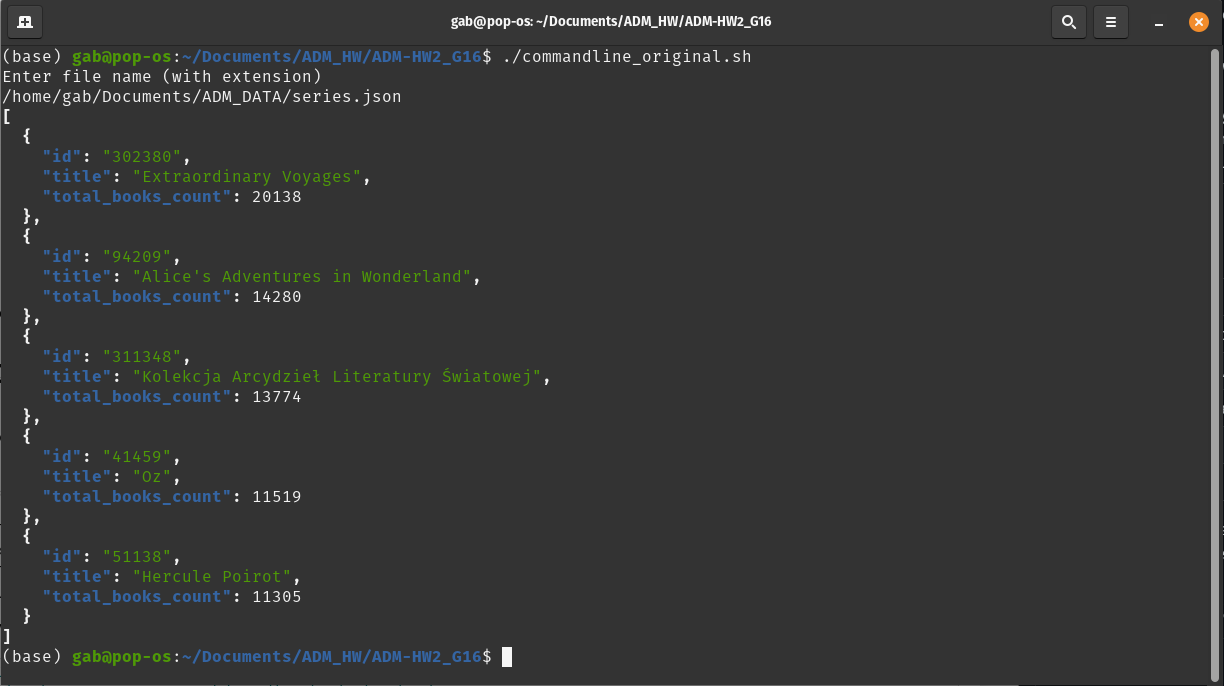

LLM script output (commandline_LLM.sh):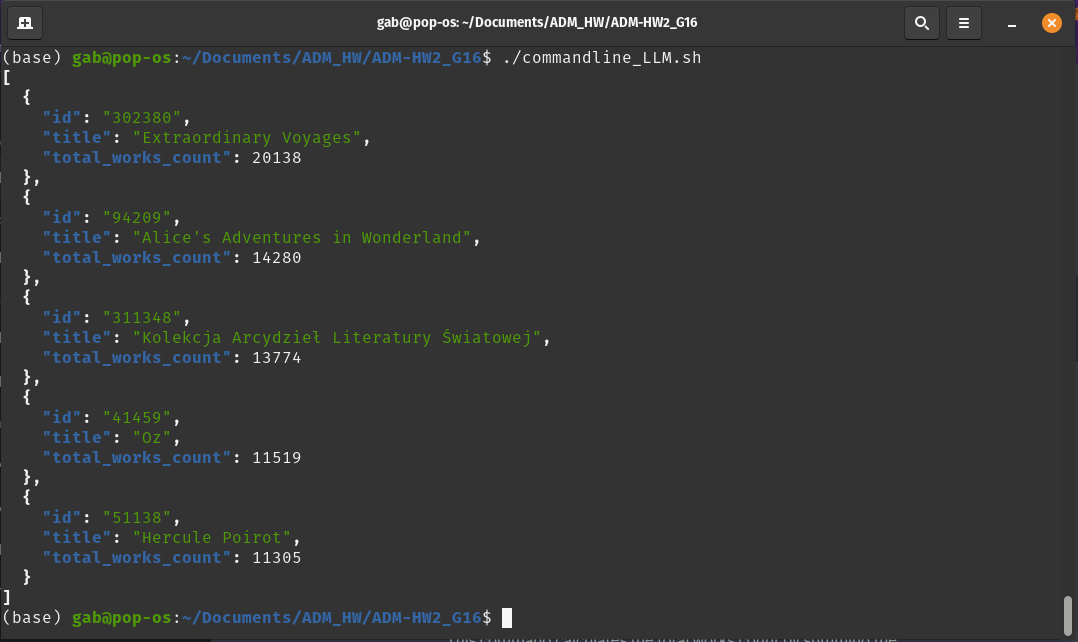

The LLM used was ChatGPT. I've given a sample of *series.json* data and asked it:  
*"Given a file named "series.json" like this one above, write a script that counts the number of elements in "works" field and returns the top 5 series with the highest total works count along with their title and id."*  
Then there was a bit of trial and error: ChatGPT returned a wrong code several times but it improved every time, by pasting the errors or the (wrong) output and pointing out what was the problem. I checked the code correctedness by taking a look at it and by comparing the output with mine (which is correct, indeed).

# AWSQ:
Step 1: Created an instance on AWS with instance type Ri7.large, chose this one cause it has the most RAM 16gb and fast intel xeon processor.  
Step 2: used the following cmd lines
* sudo apt-get install python3-pandas (install pandas)
* wget https://habibsbucket2023.s3.amazonaws.com/list.json (get the .json file)
* wget https://habibsbucket2023.s3.amazonaws.com/top5.py (get the script)
* python3 top5.py (to run the code)

And then we got the following output!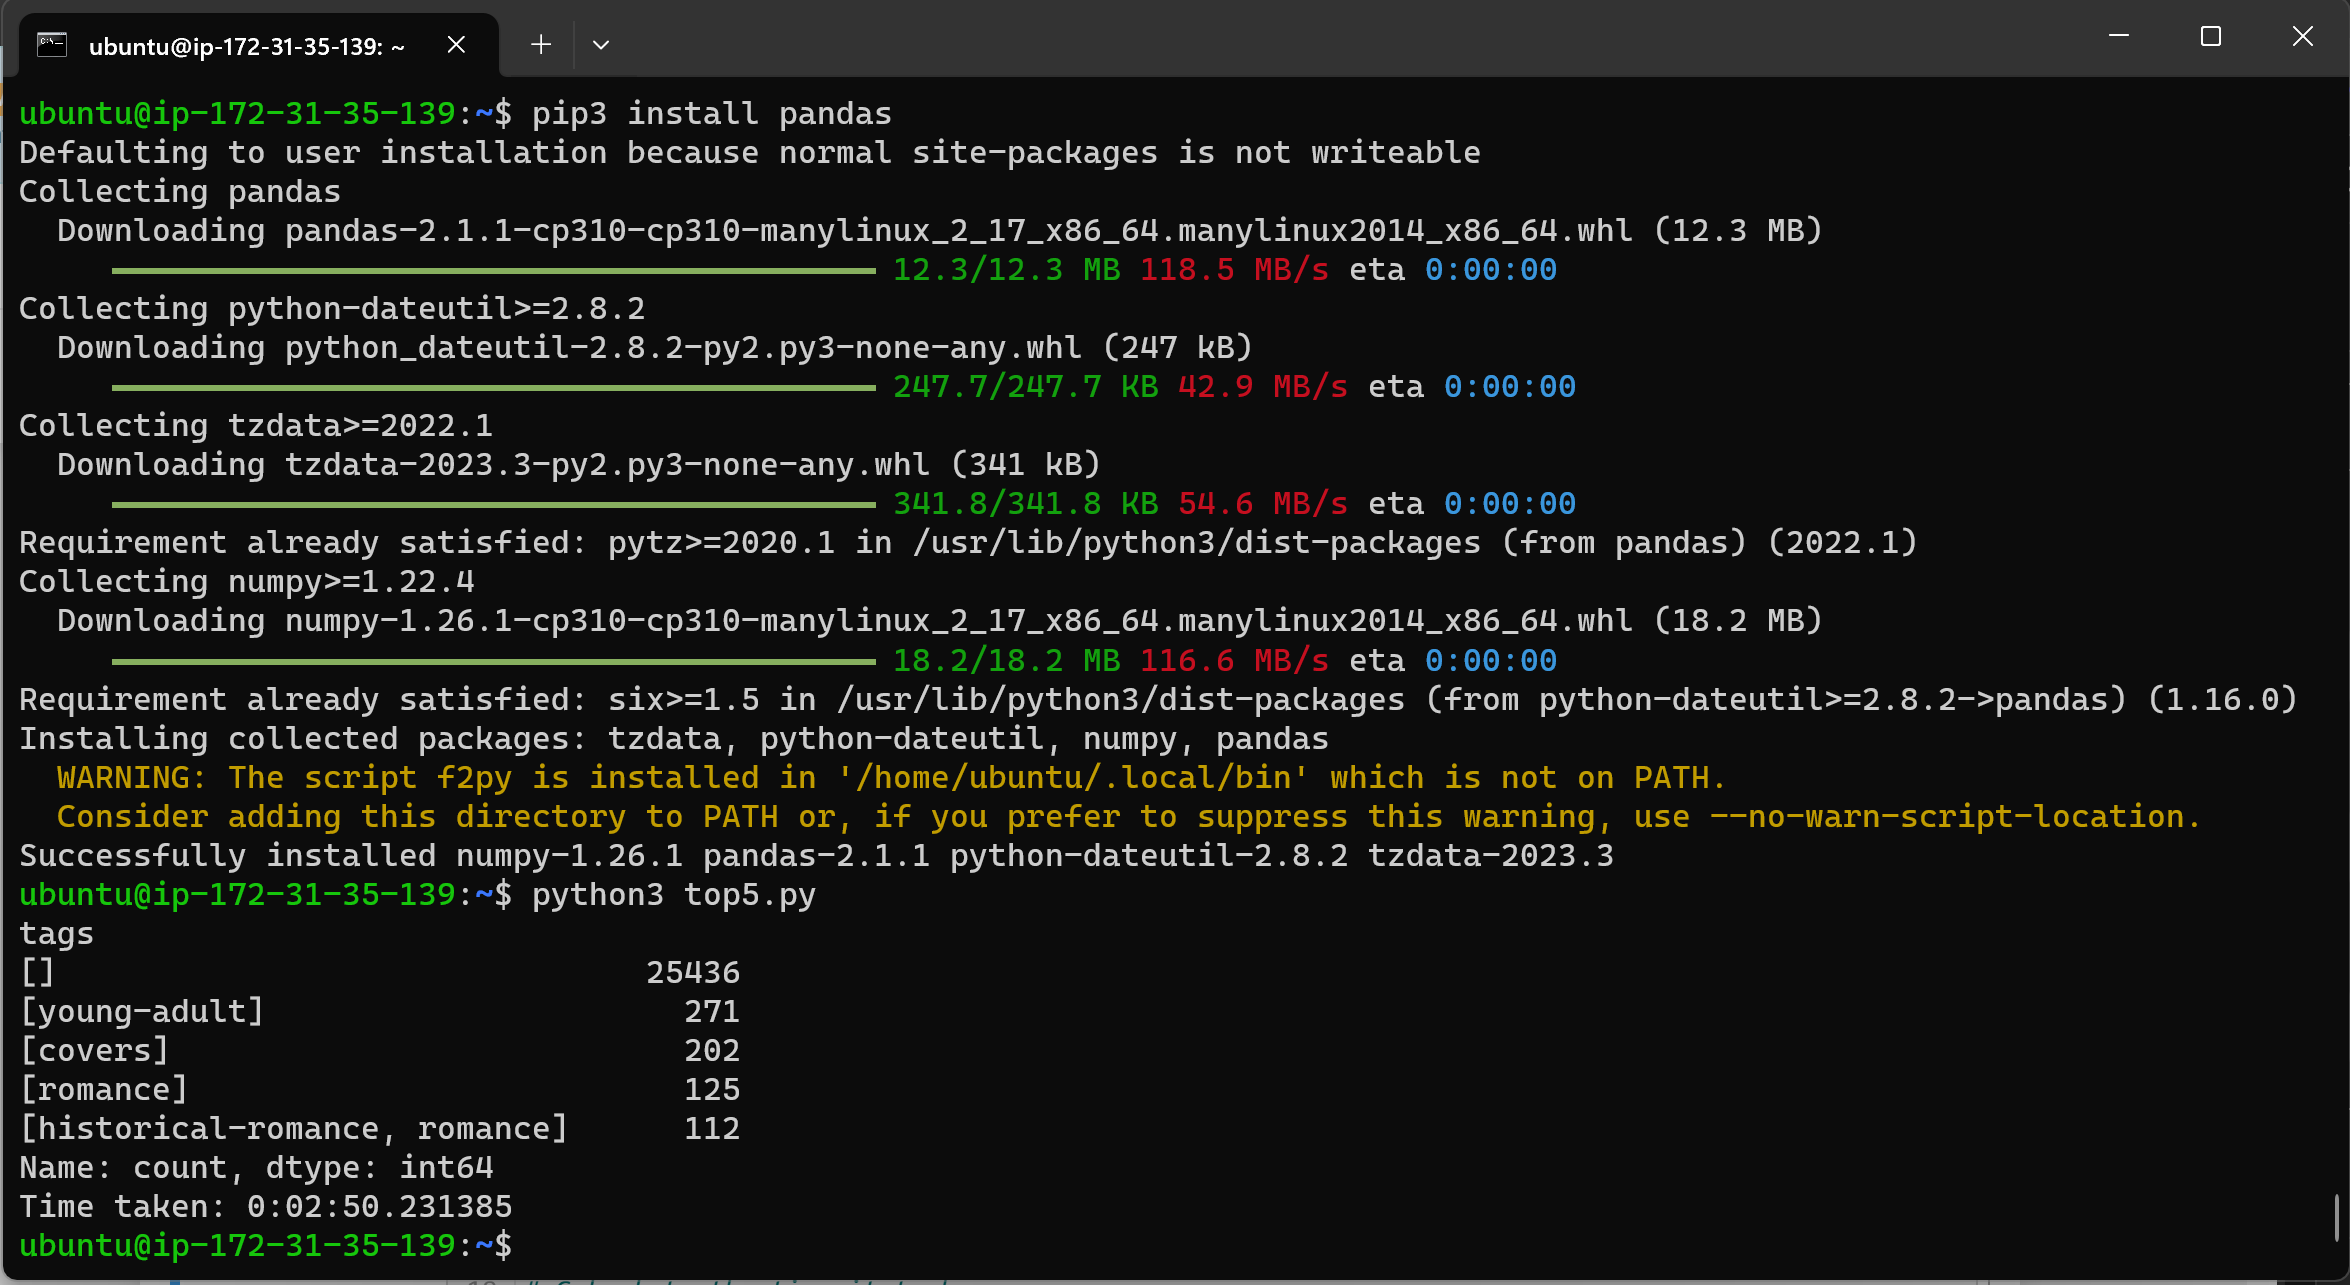

### Report
Several factors could contribute to the AWS instance outperforming the local machine.
* My laptop has lpddr3 1866 MHz ram while the AWS instance has 4800MHz DDR5 ram which is very fast and for working with datasets it is very helpful as a lot data are stored in ram while doing operations.
* If the JSON file was stored in the cloud (e.g., S3 bucket), the AWS instance would have a much faster network connection to this file compared to a personal laptop.
* AWS instances can be optimized for specific tasks, providing better performance.

In conclusion, while a personal laptop like the Surface Book 2 may be sufficient for smaller tasks, cloud services like AWS provide superior performance for resource-intensive tasks such as sorting large JSON files. However, it’s important to consider the cost associated with using these services, as they can be more expensive than using a personal laptop in the long run.

# AQ:

Assume you are working as a librarian at a public library in Rome. Some new books have arrived, and you are in charge of putting them on a shelf. Your supervisor will give you some instructions, and you will follow his. Each book has a unique ID, and your boss's instructions can be of the following types:

- L N - place the book with ID = N on the shelf to the left of the leftmost existing book
- R N - place the book with ID = N on the shelf to the right of the rightmost existing book
- ? N - Calculate the minimum number of books you must pop from the left or right to have the book with ID = N as the leftmost or rightmost book on the shelf.

You must follow your boss's instructions and report the answers to type 3 instructions to him. He guarantees that if he has a type 3 instruction for a book with a specific ID, the book has already been placed on the shelf.

Remember that once you've answered a type 3 instruction, the order of the books does not change.

**Input:**

The first line contains a single number, n, representing the number of your boss's instructions. The ith instruction the boss gives can be found at each of the following n lines.

**Output:**

Print your boss's type 3 instructions in the order they appear in the input.

##### **1. Implement a code to answer the problem above.**

In [ ]:
shelf = []
N = int(input())
for i in range(N):
    P, id = input().split()
    if P == 'L':
        shelf.insert(0, id)
    elif P == 'R':
        shelf.append(id)
    elif P == '?':
        if shelf.index(id) > len(shelf)//2:
            print(len(shelf) - shelf.index(id) - 1)
        else:
            print(shelf.index(id))

##### **2. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.**

**ChatGPT**: *The overall time complexity of the loop is determined by the worst-case scenario, which is when you insert an item at the beginning of the list, resulting in a time complexity of O(N^2) because you're doing this potentially for each iteration of the loop. This is not an efficient way to manage a queue-like structure.*

*If you need a more efficient way to handle this type of queue, you should consider using a deque (double-ended queue) from Python's collections module. It provides efficient operations for inserting and popping from both ends of the queue, resulting in an overall time complexity of O(N) for the entire loop.*

In our opinion, ChatGPT did not calculate the overall time complexity correctly; to demonstrate this, we calculated for each row the time complexity (in the worst case):

In [ ]:
shelf = []                                                  # O(1)
N = int(input())                                            # O(1)
for i in range(N):                                          # O(1)
    P, id = input().split()                                 # O(1)
    if P == 'L':                                            # O(1)
        shelf.insert(0, id)                             # O(N)
    elif P == 'R':                                          # O(1)
        shelf.append(id)                                # O(N)
    elif P == '?':                                          # O(1)
        if shelf.index(id) > len(shelf)//2:                 # O(1)
            print(len(shelf) - shelf.index(id) - 1)         # O(1)
        else:                                               # O(1)
            print(shelf.index(id))                          # O(1)

##### 3. *Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?*

Following ChatGPT's advice (i.e., to append to the deque list in case you want to hang on the left), I used the deque from collections function.

In [ ]:
from collections import deque

shelf = []                                                  # O(1)
N = int(input())                                            # O(1)
for i in range(N):                                          # O(1)
    P, id = input().split()                                 # O(1)
    if P == 'L':                                            # O(1)
        shelf= deque(shelf)                                 # O(1)
        shelf.appendleft(id)                         # O(N)
        shelf = list(shelf)                                 # O(1)
    elif P == 'R':                                          # O(1)
        shelf.append(id)                             # O(N)
    elif P == '?':                                          # O(1)
        if shelf.index(id) > len(shelf)//2:                 # O(1)
            print(len(shelf) - shelf.index(id) - 1)         # O(1)
        else:                                               # O(1)
            print(shelf.index(id))                          # O(1)